In [2]:
import os
import numpy as np

In [3]:
import torch 
import torchvision 
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torch.utils.data as Data
import matplotlib.pyplot as plt
import glob
import time

import torchvision.models as models
import torch.nn as nn

In [4]:
from tqdm import tqdm

In [16]:
noln_list = glob.glob('Y:\\data_patch\\pngs_cancer_256\\NOLN_*') # data_patch에서 NOLN에 해당하는 파일들의 경로들 모두 불러오기
ln_list = glob.glob('Y:\\data_patch\\pngs_cancer_256\\LN_*') # data_patch에서 LN에 해당하는 파일들의 경로들 모두 불러오기
lv = 3    # level3 

In [12]:
transform_train0 = transforms.Compose(
    [   
        transforms.ToTensor(),        
    ]
)

In [13]:
transform_new = nn.Sequential(
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),    
        transforms.GaussianBlur(3,sigma=(0.1,1.5)),
        transforms.ColorJitter(brightness=0.42, contrast=0.64, hue = 0.064, saturation= 0.18),
        transforms.RandomCrop((224,224)),        
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.25, 0.25, 0.25]),
)
transform_new = torch.jit.script(transform_new) # torch.jit.script: Scripting a function or nn.Module will inspect the source code,
                                                # compile it as TorchScript code using the TorchScript compiler,
                                                # and return a ScriptModule or ScriptFunction. 

# Illustration of transformation 
# https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py

In [14]:
transform_val = nn.Sequential(
        transforms.CenterCrop((224,224)),        
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.25, 0.25, 0.25]),
)
transform_val = torch.jit.script(transform_val)

In [15]:
# try 블록 수행 중 오류가 발생하면 except 블록이 수행된다.
# 하지만 try 블록에서 오류가 발생하지 않는다면 except 블록은 수행되지 않는다.

D0 = []   # D0 : ??
for dn in noln_list:   # noln_list에서 하나씩 파일 경로 가져와서
    try:
        V = ImageFolder(root=dn,transform=transform_train0) # A generic data loader where the images are arranged in this way by default:
        flag_go = 1
    except:
        flag_go = 0
    if flag_go == 1:
        idx3 = np.where(np.array(V.targets) == lv)[0] # V.target을 numpy array로 변환 했을 때 원소값이 lv와 같은 것들의 인덱스를 뽑고
                                                      # 그 중 가장 첫 번째 것을 idx3에 할당 
                                                      # ImageFolder를 사용하는 방법은 간단하다.
                                                      # 데이터가 있는 경로만 넣어주면 바로 dataset 형태로 만들어지며, 
                                                      # DataLoader에 넘겨주기만 하면 된다.
                                                      # 보통의 경우 x(input), y(target) 데이터를 받아서 학습을 시켜주게 된다.  
        V3 = Data.Subset(V,idx3)                      # idx3 (인덱스)에 대해 부모 set에서 subset으로 만듬, idx3는 lv3?  
        D0.append(V3)                                 # 그것을 V3에 할당하고 D0리스트에 append          
print(len(D0))                                        # 전체 D0의 원소 개수

100


In [35]:
print(np.where(np.array(V.targets) == lv))
print("\n")
print(np.where(np.array(V.targets) == lv)[0])
print("\n")
print(np.array(V.targets))
print("\n")
print(V)
print("\n")
print(V3)

(array([348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360,
       361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373,
       374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386,
       387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399,
       400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412,
       413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425,
       426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438,
       439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451,
       452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463],
      dtype=int64),)


[348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365
 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383
 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401
 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419
 420 421 422 423 424 425 426 427 428 429

In [32]:
D1 = []   # D1 : ??
for dn in ln_list:   # ln_list에서 하나씩 파일 경로 가져와서
    try:
        V = ImageFolder(root=dn,transform=transform_train0) 
        flag_go = 1
    except:
        flag_go = 0
        
    if flag_go == 1:
        idx3 = np.where(np.array(V.targets) == lv)[0]
        V3 = Data.Subset(V,idx3)
        D1.append(V3)
print(len(D1))
print(D1)

100
[<torch.utils.data.dataset.Subset object at 0x0000023C4ADFF4C0>, <torch.utils.data.dataset.Subset object at 0x0000023C432AB2B0>, <torch.utils.data.dataset.Subset object at 0x0000023C4AEA0A30>, <torch.utils.data.dataset.Subset object at 0x0000023C4AEA0640>, <torch.utils.data.dataset.Subset object at 0x0000023C4AEA0550>, <torch.utils.data.dataset.Subset object at 0x0000023C4AF1AA60>, <torch.utils.data.dataset.Subset object at 0x0000023C4AF1A3A0>, <torch.utils.data.dataset.Subset object at 0x0000023C436F4E80>, <torch.utils.data.dataset.Subset object at 0x0000023C436F4C70>, <torch.utils.data.dataset.Subset object at 0x0000023C436F4790>, <torch.utils.data.dataset.Subset object at 0x0000023C436F4C10>, <torch.utils.data.dataset.Subset object at 0x0000023C436F4A60>, <torch.utils.data.dataset.Subset object at 0x0000023C4D5F61C0>, <torch.utils.data.dataset.Subset object at 0x0000023C4D5F60A0>, <torch.utils.data.dataset.Subset object at 0x0000023C4D5F6640>, <torch.utils.data.dataset.Subset ob

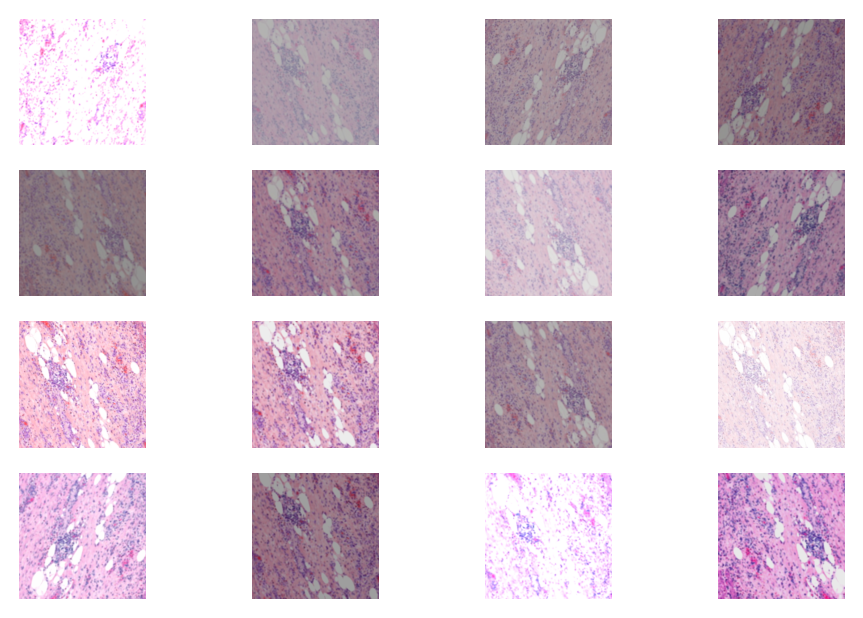

In [42]:
#>>> it = iter(range(3))
#>>> next(it)
#0
#>>> next(it)
#1
#>>> next(it)
#2
#3>>> next(it)
#Traceback (most recent call last):
#  File "<pyshell#6>", line 1, in <module>
#    next(it)
#StopIteration



plt.figure(dpi=192)
for n in range(16):
    loader = Data.DataLoader(D1[11],batch_size=4,shuffle=False)
    img = next(iter(loader))
    #print(f'img : {img}')
    #print(f'img[0] : {img[0]}')
    img = transform_new(img[0])
    #print(img)
    #print(np.transpose(img[0]*0.25 + 0.5,(1,2,0)))
    plt.subplot(4,4,n+1)
    plt.imshow(np.transpose(img[0]*0.25 + 0.5,(1,2,0))) #np.transpose
    plt.axis('off')
plt.show()

In [45]:
model = models.resnet18(True) # 모델 정의

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\user/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [46]:
for param in model.parameters():
    print(param)
    param.requires_grad = False
print("@@@@@@@@@@@@@@@@@")    
for param in model.layer4.parameters():
    print(param)
    param.requires_grad = True

Parameter containing:
tensor([[[[-1.0419e-02, -6.1356e-03, -1.8098e-03,  ...,  5.6615e-02,
            1.7083e-02, -1.2694e-02],
          [ 1.1083e-02,  9.5276e-03, -1.0993e-01,  ..., -2.7124e-01,
           -1.2907e-01,  3.7424e-03],
          [-6.9434e-03,  5.9089e-02,  2.9548e-01,  ...,  5.1972e-01,
            2.5632e-01,  6.3573e-02],
          ...,
          [-2.7535e-02,  1.6045e-02,  7.2595e-02,  ..., -3.3285e-01,
           -4.2058e-01, -2.5781e-01],
          [ 3.0613e-02,  4.0960e-02,  6.2850e-02,  ...,  4.1384e-01,
            3.9359e-01,  1.6606e-01],
          [-1.3736e-02, -3.6746e-03, -2.4084e-02,  ..., -1.5070e-01,
           -8.2230e-02, -5.7828e-03]],

         [[-1.1397e-02, -2.6619e-02, -3.4641e-02,  ...,  3.2521e-02,
            6.6221e-04, -2.5743e-02],
          [ 4.5687e-02,  3.3603e-02, -1.0453e-01,  ..., -3.1253e-01,
           -1.6051e-01, -1.2826e-03],
          [-8.3730e-04,  9.8420e-02,  4.0210e-01,  ...,  7.0789e-01,
            3.6887e-01,  1.2455e-01]

In [48]:
model.fc = nn.Linear(model.fc.in_features, 2) #fully connected layer

# self.model.fc.in_features로 fc layer 입력 채널 수를 얻음.
# pytorch에서 선형회귀 모델은 nn.Linear() 함수에 구현되어 있음.
# nn.Linear(input_dim,output_dim)
print(model.fc)

Linear(in_features=512, out_features=2, bias=True)


In [49]:
model.cuda();


# Machine을 학습시킬 때 GPU를 사용하게 되면 월등하게 성능이 좋아지게 되는데,
# 과연 내가 지금 GPU를 사용하여 학습을 하는지 CPU를 사용하고 있는지를 확인하고 싶을 때가 있다. 이럴 때는
# torch.cuda.is_available()를 통해 현재 CUDA가 사용 가능한지 또한 어떤 device가 사용 가능한지를 확인하고
# 특정 device를 사용하도록 설정할 수 있다.
# Tensor 생성 후 해당 tensor를 GPU에 loading하기 위해서

# import torch
 
# # Default CUDA device
# cuda = torch.device('cuda')
 
# allocates a tensor on default GPU
# a = torch.tensor([1., 2.], device=cuda)
 
# transfers a tensor from 'C'PU to 'G'PU
# b = torch.tensor([1., 2.]).cuda()
 
# Same with .cuda()
# b2 = torch.tensor([1., 2.]).to(device=cuda)
# 다음과 같이 tensor를 정의 (또는 변형) 하면 된다.

# model또한 .cuda()를 통해서 model의 모든 parameter를 GPU에 loading할 수 있다.

# model = NewModel()
 
# model = model.cuda()
# GPU에 load한 tensor는 동일하게 GPU에 load된 tensor끼리만 연산이 가능하다.


In [50]:
loss = torch.nn.CrossEntropyLoss()
alg = torch.optim.Adam(model.parameters(), lr=1e-5, weight_decay=1e-4)

valid class 0: tensor([47, 30, 46, 51, 39, 59, 51, 49, 52, 53, 40, 48, 49, 51, 54])
valid class 1: tensor([53, 43, 58, 49, 49, 44, 53, 48, 52, 63, 47, 53, 40, 49, 50])
epoch:  0 -- 105  seconds -- loss: 0.6506016140892392
tensor([56, 42,  7, 49, 56, 71, 61, 59, 56, 57, 54, 38, 79, 76, 47, 64],
       device='cuda:0')


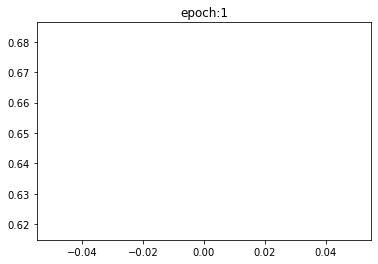

epoch:  1 -- 91  seconds -- loss: 0.6383571624755859
epoch:  2 -- 85  seconds -- loss: 0.6226505097888765
epoch:  3 -- 84  seconds -- loss: 0.6144512721470424
epoch:  4 -- 83  seconds -- loss: 0.6004153206234887
valid class 0: tensor([38, 33, 52, 51, 33, 48, 36, 64, 66, 51, 43, 51, 51, 55, 56])
valid class 1: tensor([45, 57, 53, 42, 51, 51, 59, 48, 53, 61, 54, 47, 42, 34, 50])
epoch:  5 -- 89  seconds -- loss: 0.5966879980904716
epoch:  6 -- 79  seconds -- loss: 0.6132231212797619
epoch:  7 -- 77  seconds -- loss: 0.5963469005766369
epoch:  8 -- 74  seconds -- loss: 0.5717261632283529
epoch:  9 -- 74  seconds -- loss: 0.5940088090442476
valid class 0: tensor([44, 30, 44, 45, 37, 74, 33, 48, 62, 50, 39, 55, 57, 61, 63])
valid class 1: tensor([57, 55, 61, 54, 45, 48, 63, 55, 65, 79, 59, 48, 46, 38, 51])
epoch:  10 -- 82  seconds -- loss: 0.5813032786051432
tensor([22, 53, 54, 68, 78, 23, 66, 39, 41, 41, 81, 25, 23, 32, 67, 66],
       device='cuda:0')


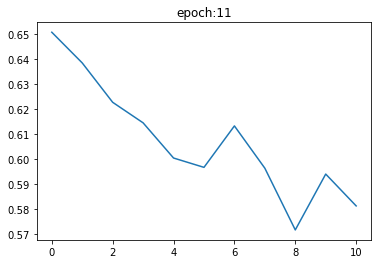

epoch:  11 -- 71  seconds -- loss: 0.5908841632661366
epoch:  12 -- 71  seconds -- loss: 0.5730419158935547
epoch:  13 -- 70  seconds -- loss: 0.5711690811883836
epoch:  14 -- 69  seconds -- loss: 0.5570932569957915
valid class 0: tensor([37, 31, 38, 46, 38, 62, 25, 47, 46, 46, 43, 40, 44, 52, 54])
valid class 1: tensor([61, 54, 52, 50, 39, 36, 58, 50, 58, 65, 53, 38, 38, 33, 36])
epoch:  15 -- 78  seconds -- loss: 0.5552970795404344
epoch:  16 -- 68  seconds -- loss: 0.5678126471383231
epoch:  17 -- 67  seconds -- loss: 0.5580606460571289
epoch:  18 -- 68  seconds -- loss: 0.5502781186785016
epoch:  19 -- 66  seconds -- loss: 0.5456435793922061
valid class 0: tensor([40, 25, 49, 47, 38, 61, 35, 58, 61, 57, 39, 51, 56, 55, 53])
valid class 1: tensor([63, 51, 63, 43, 43, 47, 60, 53, 59, 80, 61, 44, 41, 39, 53])
epoch:  20 -- 76  seconds -- loss: 0.5583277202787853
tensor([56, 16, 37, 54, 60, 64, 43, 17, 56, 72, 49, 56, 45, 64, 33, 69],
       device='cuda:0')


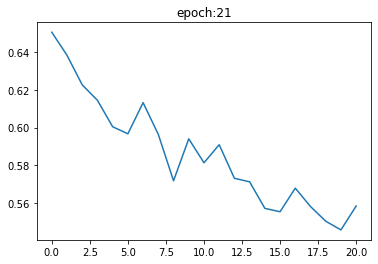

epoch:  21 -- 65  seconds -- loss: 0.5459427606491816
epoch:  22 -- 65  seconds -- loss: 0.547591663542248
epoch:  23 -- 64  seconds -- loss: 0.5448513939267113
epoch:  24 -- 65  seconds -- loss: 0.5272611890520368
valid class 0: tensor([36, 27, 38, 41, 29, 35, 37, 53, 60, 47, 42, 47, 57, 59, 65])
valid class 1: tensor([47, 45, 40, 49, 48, 50, 63, 38, 50, 61, 57, 31, 35, 38, 48])
epoch:  25 -- 73  seconds -- loss: 0.5296520505632673
epoch:  26 -- 65  seconds -- loss: 0.5362010683332171
epoch:  27 -- 63  seconds -- loss: 0.5361089252290272
epoch:  28 -- 64  seconds -- loss: 0.524910154796782
epoch:  29 -- 63  seconds -- loss: 0.5362663723173595
valid class 0: tensor([33, 21, 40, 41, 27, 56, 25, 43, 51, 51, 41, 34, 39, 49, 57])
valid class 1: tensor([48, 56, 55, 46, 48, 54, 54, 40, 60, 59, 67, 33, 34, 32, 46])
epoch:  30 -- 72  seconds -- loss: 0.5335869562058222
tensor([12,  9,  4, 35, 54, 51, 23, 61, 82, 75, 72, 79, 48, 67, 97, 97],
       device='cuda:0')


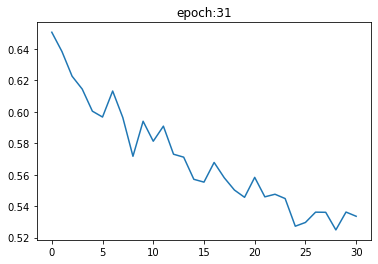

epoch:  31 -- 62  seconds -- loss: 0.5097289766584124
epoch:  32 -- 62  seconds -- loss: 0.5273607798985073
epoch:  33 -- 61  seconds -- loss: 0.5183931532360259
epoch:  34 -- 62  seconds -- loss: 0.5127322787330264
valid class 0: tensor([34, 16, 32, 43, 27, 66, 18, 43, 38, 45, 39, 40, 45, 48, 57])
valid class 1: tensor([57, 51, 60, 51, 37, 45, 64, 43, 64, 73, 60, 25, 34, 37, 40])
epoch:  35 -- 70  seconds -- loss: 0.5125245593843006
epoch:  36 -- 61  seconds -- loss: 0.5067791257585798
epoch:  37 -- 61  seconds -- loss: 0.5114427748180571
epoch:  38 -- 61  seconds -- loss: 0.49842848096575054
epoch:  39 -- 61  seconds -- loss: 0.503112656729562
valid class 0: tensor([31, 41, 45, 48, 42, 44, 37, 63, 75, 48, 48, 41, 57, 52, 68])
valid class 1: tensor([48, 65, 56, 48, 55, 52, 73, 23, 48, 65, 70, 42, 42, 47, 48])
epoch:  40 -- 69  seconds -- loss: 0.49184276944115046
tensor([10, 82, 30,  4, 87, 32,  3, 28, 78, 76, 79, 83, 51, 76, 64, 66],
       device='cuda:0')


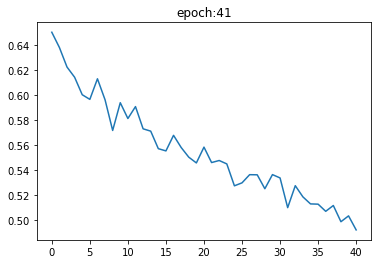

epoch:  41 -- 60  seconds -- loss: 0.50632567632766
epoch:  42 -- 60  seconds -- loss: 0.49850863502139137
epoch:  43 -- 61  seconds -- loss: 0.4884029115949358
epoch:  44 -- 60  seconds -- loss: 0.4820708774384998
valid class 0: tensor([31, 19, 32, 47, 25, 57, 23, 48, 57, 55, 45, 51, 54, 66, 57])
valid class 1: tensor([56, 72, 52, 49, 45, 53, 59, 39, 55, 64, 56, 23, 40, 26, 57])
epoch:  45 -- 69  seconds -- loss: 0.46459788367861793
epoch:  46 -- 60  seconds -- loss: 0.4729264123099191
epoch:  47 -- 60  seconds -- loss: 0.47921593983968097
epoch:  48 -- 60  seconds -- loss: 0.4729130608694894
epoch:  49 -- 60  seconds -- loss: 0.48822748093377977
valid class 0: tensor([28, 15, 34, 49, 34, 28, 39, 59, 53, 45, 43, 42, 57, 64, 46])
valid class 1: tensor([39, 63, 38, 38, 37, 47, 44, 23, 56, 50, 70, 18, 35, 30, 43])
epoch:  50 -- 68  seconds -- loss: 0.4725192387898763
tensor([39, 81,  6, 35, 76,  2, 19, 32, 94, 45, 78, 66, 79, 36, 95, 93],
       device='cuda:0')


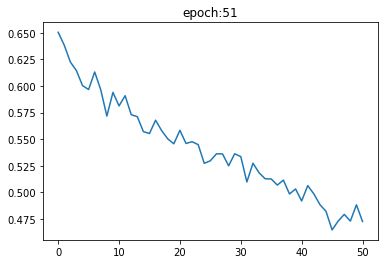

epoch:  51 -- 59  seconds -- loss: 0.4675971894037156
epoch:  52 -- 59  seconds -- loss: 0.46545160384405226
epoch:  53 -- 59  seconds -- loss: 0.471484865461077
epoch:  54 -- 59  seconds -- loss: 0.4733183724539621
valid class 0: tensor([29, 18, 34, 44, 27, 60, 32, 44, 52, 51, 46, 37, 72, 63, 58])
valid class 1: tensor([46, 49, 61, 48, 33, 53, 71, 41, 53, 67, 68, 28, 40, 45, 56])
epoch:  55 -- 67  seconds -- loss: 0.47252514248802546
epoch:  56 -- 59  seconds -- loss: 0.4666656766619001
epoch:  57 -- 59  seconds -- loss: 0.46570864177885507
epoch:  58 -- 58  seconds -- loss: 0.4823395865304129
epoch:  59 -- 58  seconds -- loss: 0.4535347620646159
valid class 0: tensor([36, 19, 35, 40, 34, 57, 39, 55, 61, 49, 46, 44, 55, 55, 59])
valid class 1: tensor([52, 69, 63, 57, 51, 48, 72, 39, 58, 62, 51, 30, 31, 34, 50])
epoch:  60 -- 66  seconds -- loss: 0.4509154274350121
tensor([ 6, 28, 40, 31, 23,  9, 10, 53, 52, 91, 86, 88, 36, 71, 59, 96],
       device='cuda:0')


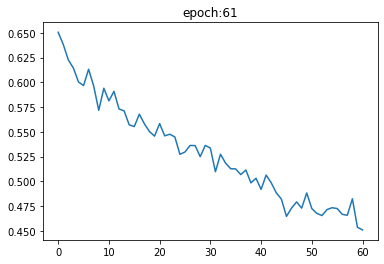

epoch:  61 -- 58  seconds -- loss: 0.4664926074800037
epoch:  62 -- 58  seconds -- loss: 0.45864246005103704
epoch:  63 -- 59  seconds -- loss: 0.43595740908668157
epoch:  64 -- 58  seconds -- loss: 0.4554444267636254
valid class 0: tensor([25, 26, 33, 32, 27, 41, 24, 47, 58, 38, 33, 39, 55, 62, 48])
valid class 1: tensor([39, 63, 54, 47, 39, 43, 55, 26, 54, 60, 62, 26, 34, 27, 52])
epoch:  65 -- 66  seconds -- loss: 0.4554322560628255
epoch:  66 -- 58  seconds -- loss: 0.45597435179210843
epoch:  67 -- 58  seconds -- loss: 0.4414381299700056
epoch:  68 -- 58  seconds -- loss: 0.4447714941842215
epoch:  69 -- 58  seconds -- loss: 0.43566921779087614
valid class 0: tensor([36, 20, 35, 33, 25, 66, 37, 45, 49, 44, 40, 53, 61, 67, 58])
valid class 1: tensor([45, 60, 66, 54, 43, 37, 64, 40, 55, 65, 56, 22, 41, 29, 41])
epoch:  70 -- 66  seconds -- loss: 0.4275201161702474
tensor([20, 11, 52,  6, 33,  3, 59, 57, 52, 50, 67, 97, 88, 90, 81,  6],
       device='cuda:0')


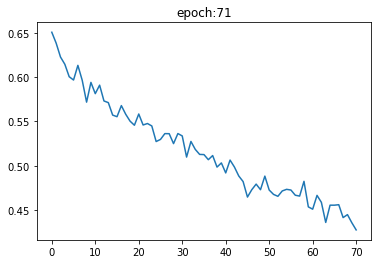

epoch:  71 -- 58  seconds -- loss: 0.4433801287696475
epoch:  72 -- 59  seconds -- loss: 0.44394979022798087
epoch:  73 -- 58  seconds -- loss: 0.4545283544631231
epoch:  74 -- 58  seconds -- loss: 0.42697452363513766
valid class 0: tensor([28, 26, 30, 37, 19, 41, 31, 34, 56, 43, 47, 41, 56, 40, 51])
valid class 1: tensor([38, 63, 58, 33, 50, 37, 58, 28, 46, 60, 62, 19, 35, 30, 32])
epoch:  75 -- 66  seconds -- loss: 0.43575713748023626
epoch:  76 -- 58  seconds -- loss: 0.43525491441999165
epoch:  77 -- 58  seconds -- loss: 0.42304524921235587
epoch:  78 -- 58  seconds -- loss: 0.4312475749424526
epoch:  79 -- 58  seconds -- loss: 0.4273717971075149
valid class 0: tensor([24, 16, 33, 35, 29, 35, 34, 40, 54, 42, 41, 49, 56, 71, 50])
valid class 1: tensor([41, 61, 59, 38, 43, 29, 72, 28, 50, 69, 59, 30, 30, 28, 30])
epoch:  80 -- 65  seconds -- loss: 0.41356704348609563
tensor([12,  1, 14, 29, 58, 19,  7, 28, 65, 82, 76, 52, 81, 64, 77, 89],
       device='cuda:0')


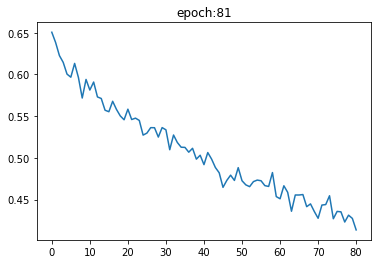

epoch:  81 -- 58  seconds -- loss: 0.40682674589611234
epoch:  82 -- 57  seconds -- loss: 0.4261928285871233
epoch:  83 -- 58  seconds -- loss: 0.4098860876900809
epoch:  84 -- 58  seconds -- loss: 0.41532693590436665
valid class 0: tensor([31, 32, 38, 43, 20, 48, 30, 36, 43, 41, 52, 38, 65, 66, 49])
valid class 1: tensor([47, 65, 55, 57, 39, 50, 51, 33, 44, 63, 57, 21, 30, 40, 46])
epoch:  85 -- 65  seconds -- loss: 0.40729622613816036
epoch:  86 -- 58  seconds -- loss: 0.4012368974231538
epoch:  87 -- 57  seconds -- loss: 0.4031508309500558
epoch:  88 -- 58  seconds -- loss: 0.4012493860153925
epoch:  89 -- 58  seconds -- loss: 0.39596244267054964
valid class 0: tensor([41, 21, 34, 48, 41, 56, 30, 42, 33, 41, 49, 39, 56, 47, 51])
valid class 1: tensor([53, 56, 68, 60, 54, 48, 75, 43, 61, 65, 50, 20, 36, 30, 35])
epoch:  90 -- 65  seconds -- loss: 0.4105993452526274
tensor([19, 35,  1,  1, 77,  9, 24, 12, 63, 94, 96, 95, 64, 13, 63, 65],
       device='cuda:0')


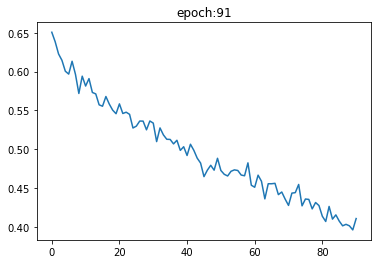

epoch:  91 -- 57  seconds -- loss: 0.4071776072184245
epoch:  92 -- 57  seconds -- loss: 0.40878827231270926
epoch:  93 -- 58  seconds -- loss: 0.4019159589494978
epoch:  94 -- 58  seconds -- loss: 0.38581225985572454
valid class 0: tensor([41, 13, 30, 46, 12, 84, 38, 29, 28, 54, 49, 51, 56, 49, 57])
valid class 1: tensor([61, 47, 68, 43, 44, 44, 66, 57, 63, 79, 54, 30, 46, 41, 44])
epoch:  95 -- 64  seconds -- loss: 0.40866724650065106
epoch:  96 -- 57  seconds -- loss: 0.38863182067871094
epoch:  97 -- 58  seconds -- loss: 0.38831510997953866
epoch:  98 -- 58  seconds -- loss: 0.39233566465831937
epoch:  99 -- 57  seconds -- loss: 0.39371781122116817
valid class 0: tensor([26, 30, 26, 32, 25, 31, 21, 50, 54, 44, 41, 45, 50, 54, 37])
valid class 1: tensor([32, 59, 53, 43, 39, 48, 67, 23, 33, 55, 62, 10, 38, 24, 42])
epoch:  100 -- 64  seconds -- loss: 0.3807212511698405
tensor([ 1, 22, 40, 38,  6, 49,  4, 63, 96, 90, 86, 57, 79, 89, 52, 50],
       device='cuda:0')


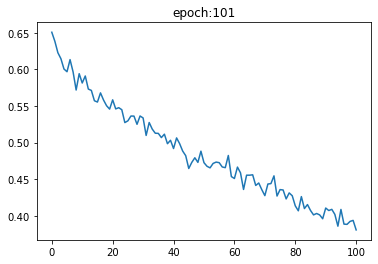

epoch:  101 -- 58  seconds -- loss: 0.40536580766950336
epoch:  102 -- 57  seconds -- loss: 0.3873177482968285
epoch:  103 -- 57  seconds -- loss: 0.4014919825962612
epoch:  104 -- 57  seconds -- loss: 0.3970015389578683
valid class 0: tensor([23, 19, 36, 44, 23, 32, 21, 47, 63, 46, 48, 51, 58, 65, 51])
valid class 1: tensor([32, 62, 49, 43, 49, 51, 63, 27, 35, 55, 59, 28, 35, 32, 42])
epoch:  105 -- 64  seconds -- loss: 0.4064674377441406
epoch:  106 -- 57  seconds -- loss: 0.39045833405994235
epoch:  107 -- 57  seconds -- loss: 0.3790959630693708
epoch:  108 -- 57  seconds -- loss: 0.3937332062494187
epoch:  109 -- 57  seconds -- loss: 0.3914989743913923
valid class 0: tensor([26, 25, 47, 18, 51, 13, 27, 63, 54, 23, 40, 34, 44, 56, 45])
valid class 1: tensor([31, 65, 63, 46, 44, 40, 58, 28, 61, 75, 52, 33, 28, 30, 33])
epoch:  110 -- 64  seconds -- loss: 0.391289302280971
tensor([ 4, 16, 60, 70,  3, 16, 38, 11, 97, 70, 87, 96, 91, 75, 70, 83],
       device='cuda:0')


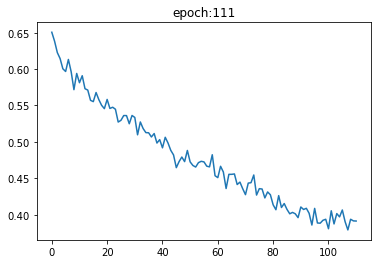

epoch:  111 -- 57  seconds -- loss: 0.36378544852847144
epoch:  112 -- 57  seconds -- loss: 0.37292219343639554
epoch:  113 -- 57  seconds -- loss: 0.39920021238781156
epoch:  114 -- 57  seconds -- loss: 0.368837833404541
valid class 0: tensor([27, 36, 32, 37, 31, 20, 35, 46, 59, 26, 49, 45, 66, 63, 61])
valid class 1: tensor([57, 60, 62, 49, 36, 53, 61, 14, 49, 58, 56, 22, 35, 39, 48])
epoch:  115 -- 64  seconds -- loss: 0.37608857381911504
epoch:  116 -- 57  seconds -- loss: 0.3711308070591518
epoch:  117 -- 57  seconds -- loss: 0.38317666734967915
epoch:  118 -- 57  seconds -- loss: 0.3616001492454892
epoch:  119 -- 57  seconds -- loss: 0.36628577822730657
valid class 0: tensor([30, 15, 37, 43, 22, 60, 40, 42, 49, 50, 30, 43, 63, 61, 50])
valid class 1: tensor([45, 72, 69, 42, 52, 41, 67, 35, 40, 66, 49, 15, 40, 19, 50])
epoch:  120 -- 64  seconds -- loss: 0.38502066476004465
tensor([ 0, 37, 11,  2,  1,  6, 23, 12, 84, 96, 92, 98, 68, 90, 11, 76],
       device='cuda:0')


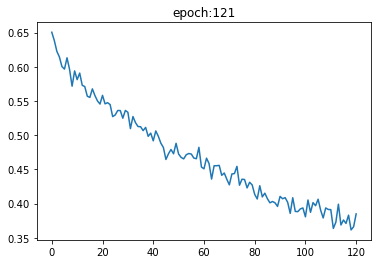

epoch:  121 -- 57  seconds -- loss: 0.345024653843471
epoch:  122 -- 57  seconds -- loss: 0.36097971598307294
epoch:  123 -- 57  seconds -- loss: 0.35491913840884254
epoch:  124 -- 57  seconds -- loss: 0.36488873617989676
valid class 0: tensor([29, 32, 32, 46, 23, 58, 42, 39, 63, 58, 42, 67, 80, 71, 61])
valid class 1: tensor([42, 64, 43, 46, 57, 65, 71, 33, 45, 56, 63, 31, 41, 29, 64])
epoch:  125 -- 64  seconds -- loss: 0.3637541816348121
epoch:  126 -- 57  seconds -- loss: 0.35161247707548593
epoch:  127 -- 57  seconds -- loss: 0.3570733978634789
epoch:  128 -- 57  seconds -- loss: 0.3662043753124419
epoch:  129 -- 57  seconds -- loss: 0.3678931054614839
valid class 0: tensor([31, 23, 46, 42, 25, 55, 42, 33, 64, 49, 59, 59, 67, 61, 57])
valid class 1: tensor([37, 73, 57, 55, 62, 44, 75, 43, 44, 65, 66, 29, 44, 46, 55])
epoch:  130 -- 64  seconds -- loss: 0.3436687333243234
tensor([20,  4,  3, 62, 39, 34, 43,  0, 96, 98, 91, 75, 77, 62,  9, 88],
       device='cuda:0')


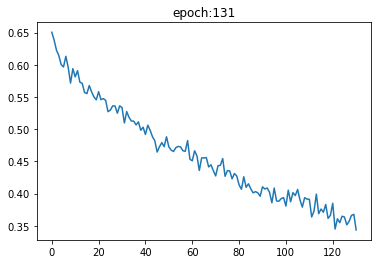

epoch:  131 -- 57  seconds -- loss: 0.3617691539582752
epoch:  132 -- 57  seconds -- loss: 0.3338648932320731
epoch:  133 -- 57  seconds -- loss: 0.34878780728294734
epoch:  134 -- 57  seconds -- loss: 0.35551023483276367
valid class 0: tensor([38, 25, 31, 55, 11, 74, 30, 22, 59, 66, 47, 61, 81, 56, 62])
valid class 1: tensor([65, 72, 81, 53, 75, 62, 51, 39, 38, 68, 56, 15, 48, 25, 73])
epoch:  135 -- 65  seconds -- loss: 0.36294728233700707
epoch:  136 -- 57  seconds -- loss: 0.34966364360990976
epoch:  137 -- 58  seconds -- loss: 0.3344884599958147
epoch:  138 -- 57  seconds -- loss: 0.3623824119567871
epoch:  139 -- 57  seconds -- loss: 0.36137689862932476
valid class 0: tensor([28, 19, 19, 39, 16, 58, 29, 31, 36, 29, 50, 43, 57, 48, 48])
valid class 1: tensor([40, 61, 52, 48, 38, 39, 64, 31, 37, 60, 36, 17, 49, 33, 38])
epoch:  140 -- 63  seconds -- loss: 0.35227244240897043
tensor([35, 36, 14, 12,  0,  5, 13, 98, 84, 59, 87, 37, 87, 92, 88, 76],
       device='cuda:0')


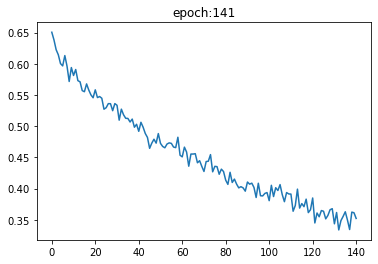

epoch:  141 -- 57  seconds -- loss: 0.35469363984607516
epoch:  142 -- 57  seconds -- loss: 0.34612782796223956
epoch:  143 -- 57  seconds -- loss: 0.33717178163074313
epoch:  144 -- 57  seconds -- loss: 0.33762650262741817
valid class 0: tensor([27, 15, 42, 48, 13, 63, 31, 40, 67, 53, 41, 46, 61, 48, 49])
valid class 1: tensor([53, 66, 71, 51, 52, 71, 74, 31, 45, 45, 56, 20, 36, 18, 56])
epoch:  145 -- 64  seconds -- loss: 0.33778497150966097
epoch:  146 -- 57  seconds -- loss: 0.34134426571073984
epoch:  147 -- 57  seconds -- loss: 0.3364121573311942
epoch:  148 -- 57  seconds -- loss: 0.3398100762140183
epoch:  149 -- 57  seconds -- loss: 0.33571992601667133
valid class 0: tensor([30,  7, 19, 36, 12, 59, 23, 20, 31, 45, 35, 35, 55, 56, 36])
valid class 1: tensor([53, 39, 63, 46, 38, 36, 52, 34, 33, 55, 34,  7, 38, 20, 42])
epoch:  150 -- 63  seconds -- loss: 0.32741208303542363
tensor([ 4,  4, 40,  0,  0, 22,  9,  9, 88, 24, 52, 81, 73, 99, 99, 99],
       device='cuda:0')


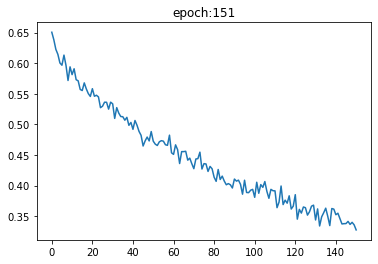

epoch:  151 -- 57  seconds -- loss: 0.3219007991609119
epoch:  152 -- 57  seconds -- loss: 0.32839613869076684
epoch:  153 -- 57  seconds -- loss: 0.3323141506740025
epoch:  154 -- 57  seconds -- loss: 0.32991229920160203
valid class 0: tensor([35, 33, 36, 46, 26, 30, 29, 41, 76, 45, 48, 55, 70, 72, 47])
valid class 1: tensor([46, 65, 59, 39, 60, 56, 47, 18, 47, 42, 31, 14, 53, 31, 59])
epoch:  155 -- 64  seconds -- loss: 0.33207273483276367
epoch:  156 -- 57  seconds -- loss: 0.3341004962012881
epoch:  157 -- 57  seconds -- loss: 0.30799325307210285
epoch:  158 -- 57  seconds -- loss: 0.3417757125127883
epoch:  159 -- 57  seconds -- loss: 0.33779646101452054
valid class 0: tensor([39, 27, 27, 32, 31, 43, 27, 26, 54, 29, 42, 37, 63, 52, 38])
valid class 1: tensor([37, 51, 67, 44, 58, 48, 61, 26, 31, 49, 43, 14, 33, 31, 33])
epoch:  160 -- 63  seconds -- loss: 0.3455671582903181
tensor([ 0,  4,  4, 62,  3, 34, 25,  1, 84, 79, 97, 99, 73, 89, 63, 86],
       device='cuda:0')


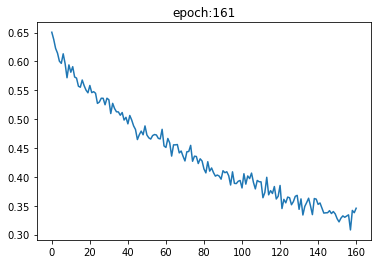

epoch:  161 -- 57  seconds -- loss: 0.33437211172921316
epoch:  162 -- 57  seconds -- loss: 0.303191275823684
epoch:  163 -- 57  seconds -- loss: 0.31716156005859375
epoch:  164 -- 57  seconds -- loss: 0.335824035462879
valid class 0: tensor([38, 18, 34, 39, 22, 57, 36, 25, 55, 34, 65, 56, 51, 59, 45])
valid class 1: tensor([32, 50, 80, 51, 42, 32, 55, 45, 42, 69, 52, 14, 42, 26, 37])
epoch:  165 -- 63  seconds -- loss: 0.307783081417992
epoch:  166 -- 57  seconds -- loss: 0.3001511437552316
epoch:  167 -- 57  seconds -- loss: 0.3313865888686407
epoch:  168 -- 57  seconds -- loss: 0.332344236828032
epoch:  169 -- 57  seconds -- loss: 0.31049855550130206
valid class 0: tensor([31, 17, 34, 41, 19, 38, 37, 54, 58, 34, 51, 30, 59, 50, 35])
valid class 1: tensor([22, 60, 65, 50, 48, 43, 51, 24, 25, 54, 44, 11, 37, 16, 32])
epoch:  170 -- 63  seconds -- loss: 0.32787665866670157
tensor([50, 10, 26, 54, 46, 66,  0,  0, 80, 53, 98, 84, 99, 75, 96, 95],
       device='cuda:0')


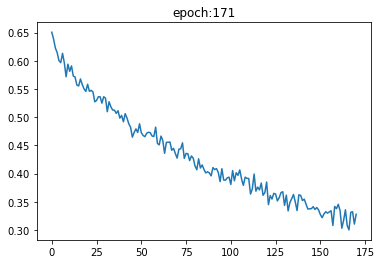

epoch:  171 -- 57  seconds -- loss: 0.3364922659737723
epoch:  172 -- 57  seconds -- loss: 0.32069837479364305
epoch:  173 -- 57  seconds -- loss: 0.3170530455453055
epoch:  174 -- 57  seconds -- loss: 0.32245122818719774
valid class 0: tensor([28, 28, 48, 41, 25, 29, 29, 44, 71, 28, 53, 51, 66, 63, 31])
valid class 1: tensor([32, 76, 47, 29, 51, 42, 65, 33, 48, 43, 46, 19, 42, 30, 46])
epoch:  175 -- 67  seconds -- loss: 0.317804495493571
epoch:  176 -- 57  seconds -- loss: 0.31920280910673593
epoch:  177 -- 58  seconds -- loss: 0.3113490286327544
epoch:  178 -- 57  seconds -- loss: 0.3037793976919992
epoch:  179 -- 57  seconds -- loss: 0.3007924897330148
valid class 0: tensor([30, 27, 22, 29, 25, 56, 29, 23, 42, 49, 50, 32, 67, 48, 35])
valid class 1: tensor([48, 45, 65, 43, 32, 27, 55, 28, 27, 61, 41,  8, 43, 36, 33])
epoch:  180 -- 63  seconds -- loss: 0.3082363946097238
tensor([ 3, 35, 18,  7,  5,  9,  8, 18, 99, 99, 85, 99, 76, 95, 96, 87],
       device='cuda:0')


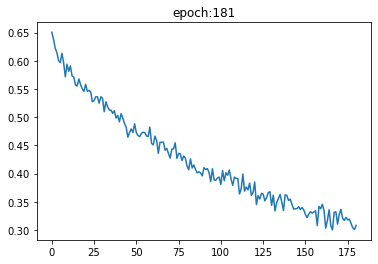

epoch:  181 -- 57  seconds -- loss: 0.3091429528735933
epoch:  182 -- 57  seconds -- loss: 0.30690763110206243
epoch:  183 -- 57  seconds -- loss: 0.3083719071887788
epoch:  184 -- 57  seconds -- loss: 0.29054836999802364
valid class 0: tensor([37, 35, 24, 33,  7, 87, 25, 17, 38, 57, 54, 61, 71, 53, 48])
valid class 1: tensor([55, 57, 77, 57, 45, 36, 60, 46, 49, 72, 53, 11, 49, 34, 75])
epoch:  185 -- 63  seconds -- loss: 0.308482601529076
epoch:  186 -- 57  seconds -- loss: 0.31318033309209914
epoch:  187 -- 57  seconds -- loss: 0.2860126041230701
epoch:  188 -- 57  seconds -- loss: 0.3035116422744024
epoch:  189 -- 57  seconds -- loss: 0.29985334759666804
valid class 0: tensor([13, 33, 32, 31, 36, 13, 19, 51, 70, 11, 46, 24, 59, 49, 34])
valid class 1: tensor([11, 48, 37, 38, 33, 45, 53, 10, 37, 34, 29, 23, 23, 30, 24])
epoch:  190 -- 63  seconds -- loss: 0.3011337234860375
tensor([ 7,  4,  0, 46, 26,  0,  4, 83, 81, 96, 97, 99, 61, 98, 88, 60],
       device='cuda:0')


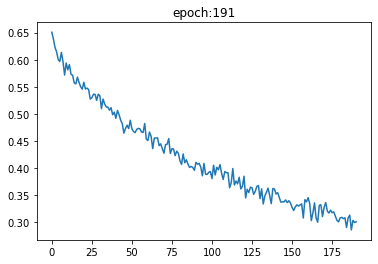

epoch:  191 -- 57  seconds -- loss: 0.30988016582670663
epoch:  192 -- 57  seconds -- loss: 0.2969961166381836
epoch:  193 -- 57  seconds -- loss: 0.30276007879348027
epoch:  194 -- 57  seconds -- loss: 0.2896801403590611
valid class 0: tensor([31, 31, 29, 28, 30, 25, 35, 50, 69, 24, 37, 38, 62, 56, 31])
valid class 1: tensor([37, 56, 58, 33, 40, 39, 61, 13, 43, 34, 46, 23, 38, 20, 37])
epoch:  195 -- 63  seconds -- loss: 0.29216586975824266
epoch:  196 -- 57  seconds -- loss: 0.2859009788149879
epoch:  197 -- 57  seconds -- loss: 0.2791097504752023
epoch:  198 -- 57  seconds -- loss: 0.2801326797122047
epoch:  199 -- 57  seconds -- loss: 0.2963344483148484
valid class 0: tensor([43, 38, 57, 38, 53, 22, 39, 54, 83, 44, 59, 46, 68, 56, 54])
valid class 1: tensor([43, 70, 68, 51, 55, 45, 64, 38, 48, 40, 38, 27, 45, 32, 58])
epoch:  200 -- 63  seconds -- loss: 0.2709332193647112
tensor([21, 27, 23, 29, 75,  4, 19,  0, 89,  0, 99, 96, 99, 90, 91, 23],
       device='cuda:0')


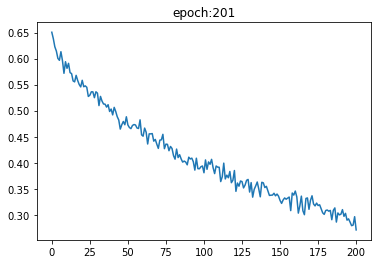

epoch:  201 -- 57  seconds -- loss: 0.2826765605381557
epoch:  202 -- 57  seconds -- loss: 0.3035554431733631
epoch:  203 -- 57  seconds -- loss: 0.3006040482293992
epoch:  204 -- 57  seconds -- loss: 0.2887894766671317
valid class 0: tensor([38, 35, 37, 41, 50, 21, 39, 51, 53, 33, 58, 41, 58, 51, 31])
valid class 1: tensor([30, 67, 58, 59, 49, 54, 58, 18, 41, 55, 53, 23, 42, 30, 38])
epoch:  205 -- 63  seconds -- loss: 0.29365273884364534
epoch:  206 -- 57  seconds -- loss: 0.2921300388517834
epoch:  207 -- 57  seconds -- loss: 0.3042957896278018
epoch:  208 -- 57  seconds -- loss: 0.2654243877955845
epoch:  209 -- 57  seconds -- loss: 0.2889231727236793
valid class 0: tensor([46, 30, 32, 50, 33, 68, 42, 33, 67, 58, 67, 53, 67, 52, 60])
valid class 1: tensor([64, 73, 80, 39, 77, 47, 70, 53, 54, 69, 37, 13, 53, 27, 62])
epoch:  210 -- 63  seconds -- loss: 0.2912646702357701
tensor([ 2,  3, 27, 21, 15,  9,  0, 17, 99, 98, 99, 38, 98, 93, 65, 99],
       device='cuda:0')


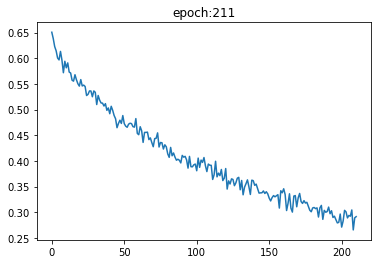

epoch:  211 -- 57  seconds -- loss: 0.2742041633242652
epoch:  212 -- 56  seconds -- loss: 0.2715278125944592
epoch:  213 -- 57  seconds -- loss: 0.2888253529866536
epoch:  214 -- 57  seconds -- loss: 0.2609993843805222
valid class 0: tensor([39, 17, 42, 51, 16, 66, 27, 25, 60, 52, 52, 63, 60, 70, 44])
valid class 1: tensor([47, 69, 56, 39, 45, 52, 60, 32, 28, 55, 45, 16, 43, 33, 45])
epoch:  215 -- 63  seconds -- loss: 0.27712851478939965
epoch:  216 -- 57  seconds -- loss: 0.28141905012584867
epoch:  217 -- 57  seconds -- loss: 0.2792089098975772
epoch:  218 -- 57  seconds -- loss: 0.2914010002499535
epoch:  219 -- 58  seconds -- loss: 0.2617036501566569
valid class 0: tensor([37, 24, 27, 42, 18, 79, 40, 23, 54, 50, 47, 58, 58, 49, 57])
valid class 1: tensor([67, 58, 68, 33, 41, 48, 64, 54, 28, 84, 42, 15, 42, 28, 45])
epoch:  220 -- 65  seconds -- loss: 0.27718668892270043
tensor([ 2,  2, 33, 10, 25, 44, 11,  3, 91, 65, 97, 90, 60, 16, 91, 99],
       device='cuda:0')


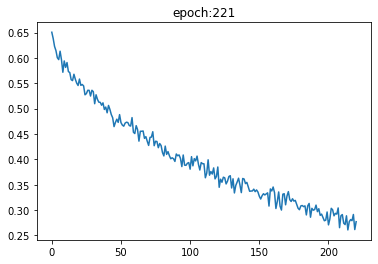

epoch:  221 -- 57  seconds -- loss: 0.28000772567022414
epoch:  222 -- 57  seconds -- loss: 0.27012057531447636
epoch:  223 -- 57  seconds -- loss: 0.287987436567034
epoch:  224 -- 57  seconds -- loss: 0.27673734937395367
valid class 0: tensor([31, 19, 22, 18, 22, 38, 24, 40, 40, 17, 34, 25, 42, 49, 34])
valid class 1: tensor([31, 61, 60, 48, 66, 35, 57, 20, 24, 52, 47, 15, 23, 24, 36])
epoch:  225 -- 63  seconds -- loss: 0.27013435817900155
epoch:  226 -- 57  seconds -- loss: 0.2658105350676037
epoch:  227 -- 57  seconds -- loss: 0.2776785350981213
epoch:  228 -- 57  seconds -- loss: 0.26828809011550175
epoch:  229 -- 57  seconds -- loss: 0.24839426222301664
valid class 0: tensor([55, 21, 35, 44, 17, 58, 28, 26, 31, 46, 49, 48, 64, 50, 38])
valid class 1: tensor([61, 60, 58, 52, 34, 54, 51, 42, 24, 67, 42,  9, 45, 22, 61])
epoch:  230 -- 63  seconds -- loss: 0.2669002442132859
tensor([38,  8, 14,  4,  3, 10, 20, 54, 77, 95, 46, 99, 11, 99, 96, 79],
       device='cuda:0')


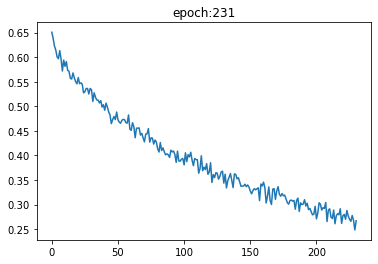

epoch:  231 -- 57  seconds -- loss: 0.2599733897617885
epoch:  232 -- 57  seconds -- loss: 0.24764151800246464
epoch:  233 -- 56  seconds -- loss: 0.27279411043439594
epoch:  234 -- 57  seconds -- loss: 0.2515773091997419
valid class 0: tensor([31, 21, 30, 37, 30, 62, 22, 35, 73, 72, 36, 59, 87, 54, 45])
valid class 1: tensor([40, 50, 58, 32, 57, 58, 72, 22, 17, 57, 53, 13, 46, 39, 48])
epoch:  235 -- 63  seconds -- loss: 0.2717715899149577
epoch:  236 -- 57  seconds -- loss: 0.25511282966250465
epoch:  237 -- 57  seconds -- loss: 0.2551348095848447
epoch:  238 -- 57  seconds -- loss: 0.26227848870413645
epoch:  239 -- 57  seconds -- loss: 0.2801911263238816
valid class 0: tensor([38, 25, 33, 25, 23, 50, 15, 36, 84, 40, 43, 50, 53, 69, 30])
valid class 1: tensor([37, 60, 68, 43, 45, 50, 52, 20, 22, 46, 44, 12, 44, 20, 57])
epoch:  240 -- 63  seconds -- loss: 0.2523337999979655
tensor([14,  0, 23,  0,  8, 27,  0, 82, 68, 25, 98, 98, 93, 74, 97, 95],
       device='cuda:0')


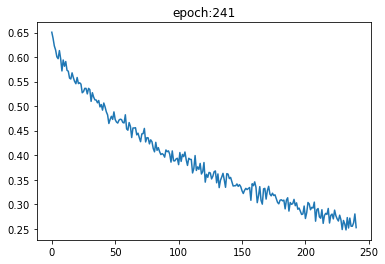

epoch:  241 -- 57  seconds -- loss: 0.2712123961675735
epoch:  242 -- 57  seconds -- loss: 0.2518650009518578
epoch:  243 -- 57  seconds -- loss: 0.2599607195172991
epoch:  244 -- 57  seconds -- loss: 0.2762297448657808
valid class 0: tensor([45, 31, 43, 57, 17, 84, 30, 29, 63, 64, 43, 69, 73, 55, 58])
valid class 1: tensor([57, 79, 62, 48, 78, 76, 76, 54, 58, 73, 68, 30, 56, 48, 64])
epoch:  245 -- 63  seconds -- loss: 0.2599463689894903
epoch:  246 -- 57  seconds -- loss: 0.2526785759698777
epoch:  247 -- 57  seconds -- loss: 0.2655293373834519
epoch:  248 -- 57  seconds -- loss: 0.2614416167849586
epoch:  249 -- 57  seconds -- loss: 0.2437026614234561
valid class 0: tensor([61, 24, 31, 51, 37, 63, 46, 25, 65, 54, 42, 49, 76, 61, 46])
valid class 1: tensor([58, 72, 82, 44, 65, 51, 61, 43, 28, 55, 48, 17, 43, 31, 62])
epoch:  250 -- 63  seconds -- loss: 0.26745296659923734
tensor([47,  2,  4,  0,  2,  1,  6,  1, 80, 99, 97, 37, 48, 81, 94, 73],
       device='cuda:0')


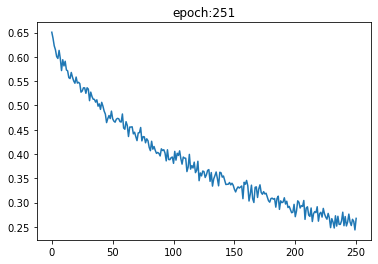

epoch:  251 -- 57  seconds -- loss: 0.2574841635567801
epoch:  252 -- 57  seconds -- loss: 0.2779092788696289
epoch:  253 -- 57  seconds -- loss: 0.2530998275393531
epoch:  254 -- 57  seconds -- loss: 0.24782155808948336
valid class 0: tensor([47, 23, 36, 47, 45, 70, 35, 26, 82, 44, 47, 64, 74, 85, 50])
valid class 1: tensor([55, 48, 68, 44, 70, 62, 70, 23, 48, 56, 54, 25, 46, 29, 54])
epoch:  255 -- 63  seconds -- loss: 0.25840302876063753
epoch:  256 -- 56  seconds -- loss: 0.2504734084719703
epoch:  257 -- 57  seconds -- loss: 0.259872936067127
epoch:  258 -- 56  seconds -- loss: 0.2450889405750093
epoch:  259 -- 57  seconds -- loss: 0.2489977791195824
valid class 0: tensor([35, 28, 26, 34, 27, 23, 28, 42, 65, 28, 46, 37, 63, 42, 37])
valid class 1: tensor([43, 47, 62, 50, 42, 32, 66, 28, 33, 48, 42,  9, 36, 25, 66])
epoch:  260 -- 63  seconds -- loss: 0.2481124968755813
tensor([ 0, 67,  2,  2, 26,  2, 17,  2, 99, 75, 80, 83, 23, 70, 78, 95],
       device='cuda:0')


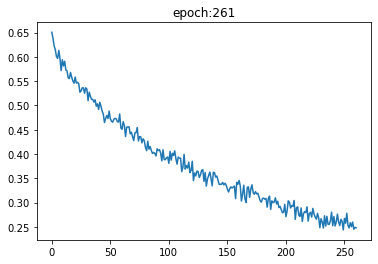

epoch:  261 -- 56  seconds -- loss: 0.23946664446876162
epoch:  262 -- 56  seconds -- loss: 0.23983260563441686
epoch:  263 -- 56  seconds -- loss: 0.247245538802374
epoch:  264 -- 56  seconds -- loss: 0.2583716029212588
valid class 0: tensor([61, 24, 46, 58, 24, 85, 33, 20, 61, 76, 30, 61, 77, 55, 62])
valid class 1: tensor([56, 71, 70, 39, 60, 60, 68, 44, 48, 68, 62, 11, 64, 27, 60])
epoch:  265 -- 62  seconds -- loss: 0.252911749340239
epoch:  266 -- 57  seconds -- loss: 0.26210732687087285
epoch:  267 -- 57  seconds -- loss: 0.22625739233834402
epoch:  268 -- 57  seconds -- loss: 0.26238377888997394
epoch:  269 -- 57  seconds -- loss: 0.2581102507455008
valid class 0: tensor([35, 23, 36, 61, 23, 82, 14, 29, 60, 68, 48, 74, 77, 57, 63])
valid class 1: tensor([79, 62, 75, 42, 63, 59, 63, 59, 49, 69, 61, 13, 51, 43, 65])
epoch:  270 -- 63  seconds -- loss: 0.2450245221455892
tensor([20,  0,  0,  0,  0,  3,  7,  2, 99, 10, 99, 94, 66, 71, 91, 94],
       device='cuda:0')


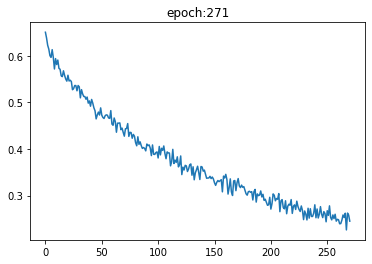

epoch:  271 -- 57  seconds -- loss: 0.23045058477492558
epoch:  272 -- 57  seconds -- loss: 0.24895486377534412
epoch:  273 -- 57  seconds -- loss: 0.23978598912556967
epoch:  274 -- 57  seconds -- loss: 0.2227482341584705
valid class 0: tensor([42, 33, 40, 58, 31, 62, 29, 32, 70, 50, 48, 70, 79, 64, 35])
valid class 1: tensor([40, 70, 67, 51, 54, 63, 61, 29, 47, 72, 66, 21, 54, 39, 66])
epoch:  275 -- 63  seconds -- loss: 0.24431748617263066
epoch:  276 -- 57  seconds -- loss: 0.24100072043282644
epoch:  277 -- 57  seconds -- loss: 0.24122828528994605
epoch:  278 -- 57  seconds -- loss: 0.23280491147722518
epoch:  279 -- 57  seconds -- loss: 0.24380254745483398
valid class 0: tensor([38, 42, 28, 33, 60, 34, 36, 65, 57, 36, 62, 33, 54, 55, 30])
valid class 1: tensor([39, 70, 61, 59, 53, 33, 70, 36, 40, 55, 32, 18, 42, 29, 36])
epoch:  280 -- 63  seconds -- loss: 0.24864419301350912
tensor([ 1, 39, 22, 19,  9,  3,  0,  4, 67, 91, 79, 91, 97, 92, 98, 80],
       device='cuda:0')


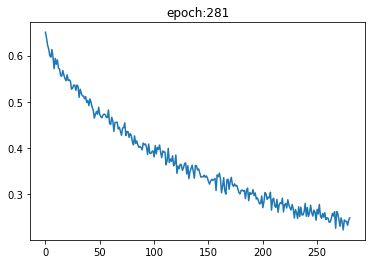

epoch:  281 -- 57  seconds -- loss: 0.23467851820446195
epoch:  282 -- 57  seconds -- loss: 0.23902772721790133
epoch:  283 -- 57  seconds -- loss: 0.2521011261712937
epoch:  284 -- 57  seconds -- loss: 0.23908126921880812
valid class 0: tensor([36, 39, 31, 21, 44, 16, 18, 48, 43, 29, 49, 40, 49, 36, 34])
valid class 1: tensor([28, 54, 49, 52, 58, 35, 55, 15, 31, 37, 40, 23, 30, 19, 44])
epoch:  285 -- 63  seconds -- loss: 0.23339239756266275
epoch:  286 -- 57  seconds -- loss: 0.2369295528956822
epoch:  287 -- 57  seconds -- loss: 0.22881957462855748
epoch:  288 -- 56  seconds -- loss: 0.23769614810035342
epoch:  289 -- 56  seconds -- loss: 0.21781746546427408
valid class 0: tensor([41, 42, 37, 45, 43, 46, 21, 40, 66, 38, 38, 51, 62, 69, 35])
valid class 1: tensor([41, 61, 63, 57, 62, 35, 55, 40, 23, 65, 35, 14, 46, 26, 38])
epoch:  290 -- 63  seconds -- loss: 0.22115416753859746
tensor([ 3,  3, 25,  0,  1,  8, 13, 11, 32, 96, 84, 88, 99, 59, 97, 80],
       device='cuda:0')


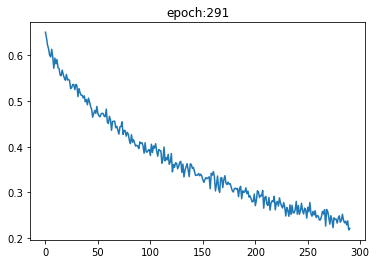

epoch:  291 -- 57  seconds -- loss: 0.23889891306559244
epoch:  292 -- 57  seconds -- loss: 0.2336599486214774
epoch:  293 -- 57  seconds -- loss: 0.24524797712053573
epoch:  294 -- 57  seconds -- loss: 0.23106511433919272
valid class 0: tensor([31, 28, 29, 20, 65, 10, 21, 64, 71, 23, 49, 18, 42, 53, 29])
valid class 1: tensor([36, 75, 74, 58, 31, 19, 66, 28, 44, 44, 57, 25, 20, 31, 22])
epoch:  295 -- 62  seconds -- loss: 0.23632612682524182
epoch:  296 -- 56  seconds -- loss: 0.21500342232840403
epoch:  297 -- 57  seconds -- loss: 0.2304721786862328
epoch:  298 -- 57  seconds -- loss: 0.22399377822875977
epoch:  299 -- 57  seconds -- loss: 0.2298907779511951
valid class 0: tensor([42, 25, 42, 46, 55, 35, 28, 41, 56, 56, 34, 56, 77, 71, 43])
valid class 1: tensor([51, 76, 57, 47, 64, 53, 63, 43, 29, 67, 66, 21, 47, 47, 63])
epoch:  300 -- 63  seconds -- loss: 0.2164288021269299
tensor([25, 83, 15,  3,  4,  8,  2,  0, 99, 78, 95, 95, 75, 89, 89, 99],
       device='cuda:0')


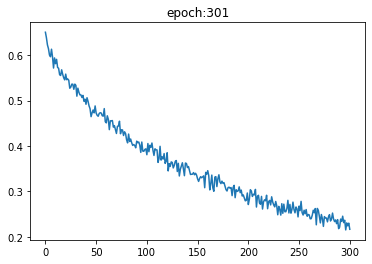

epoch:  301 -- 57  seconds -- loss: 0.21418918882097518
epoch:  302 -- 57  seconds -- loss: 0.21969820204235257
epoch:  303 -- 57  seconds -- loss: 0.22036913463047572
epoch:  304 -- 56  seconds -- loss: 0.24379096712384904
valid class 0: tensor([31, 61, 37, 24, 48, 10, 34, 71, 60, 29, 51, 49, 54, 44, 30])
valid class 1: tensor([28, 56, 52, 43, 35, 30, 58, 29, 36, 56, 37, 38, 42, 26, 22])
epoch:  305 -- 63  seconds -- loss: 0.2119406291416713
epoch:  306 -- 56  seconds -- loss: 0.21870638075329007
epoch:  307 -- 56  seconds -- loss: 0.22374534606933594
epoch:  308 -- 57  seconds -- loss: 0.23041911352248418
epoch:  309 -- 57  seconds -- loss: 0.20842193421863375
valid class 0: tensor([49, 47, 50, 37, 41, 48, 34, 42, 53, 34, 45, 50, 76, 52, 51])
valid class 1: tensor([37, 64, 53, 37, 57, 23, 53, 37, 34, 75, 41, 13, 38, 40, 49])
epoch:  310 -- 63  seconds -- loss: 0.22889902478172666
tensor([79,  3,  0,  0,  2, 36, 81, 40, 97, 91, 99, 52, 87, 99, 93, 86],
       device='cuda:0')


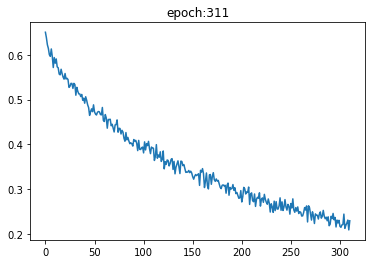

epoch:  311 -- 57  seconds -- loss: 0.22010921296619235
epoch:  312 -- 57  seconds -- loss: 0.22465730848766507
epoch:  313 -- 57  seconds -- loss: 0.2069442385718936
epoch:  314 -- 57  seconds -- loss: 0.23221524556477866
valid class 0: tensor([39, 29, 41, 34, 33, 28, 30, 40, 53, 27, 66, 55, 65, 52, 46])
valid class 1: tensor([49, 54, 65, 59, 56, 43, 67, 17, 46, 68, 48, 30, 41, 36, 49])
epoch:  315 -- 63  seconds -- loss: 0.21177314576648532
epoch:  316 -- 57  seconds -- loss: 0.22628284635997953
epoch:  317 -- 57  seconds -- loss: 0.20286067326863608
epoch:  318 -- 57  seconds -- loss: 0.21758978707449778
epoch:  319 -- 57  seconds -- loss: 0.21200114204770043
valid class 0: tensor([44, 33, 33, 30, 38, 49, 19, 30, 37, 19, 48, 43, 59, 37, 29])
valid class 1: tensor([67, 50, 57, 53, 62, 34, 68, 10, 32, 59, 61, 12, 40, 14, 43])
epoch:  320 -- 63  seconds -- loss: 0.21400208700270879
tensor([ 0, 15,  3,  1, 72, 56,  7,  0, 98, 90, 99, 88, 91, 90, 76, 99],
       device='cuda:0')


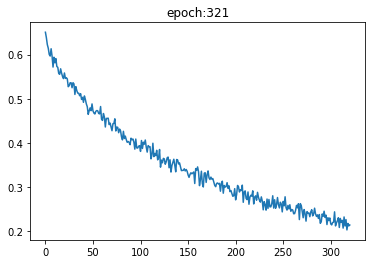

epoch:  321 -- 57  seconds -- loss: 0.22251113255818686
epoch:  322 -- 57  seconds -- loss: 0.20932501838320777
epoch:  323 -- 57  seconds -- loss: 0.2187478882925851
epoch:  324 -- 57  seconds -- loss: 0.21179712386358351
valid class 0: tensor([57, 16, 40, 39, 34, 91, 40, 26, 64, 51, 45, 68, 87, 79, 57])
valid class 1: tensor([55, 51, 79, 53, 66, 47, 76, 70, 43, 89, 53, 29, 56, 36, 60])
epoch:  325 -- 63  seconds -- loss: 0.22392443248203822
epoch:  326 -- 57  seconds -- loss: 0.23584815434047154
epoch:  327 -- 57  seconds -- loss: 0.22265956515357607
epoch:  328 -- 56  seconds -- loss: 0.20661142894199916
epoch:  329 -- 56  seconds -- loss: 0.19607355481102354
valid class 0: tensor([45, 11, 31, 51, 38, 53, 23, 27, 35, 34, 52, 57, 63, 36, 42])
valid class 1: tensor([54, 57, 73, 34, 54, 47, 65, 24, 32, 74, 38, 14, 48, 31, 52])
epoch:  330 -- 62  seconds -- loss: 0.21281748726254418
tensor([ 0,  0,  0,  0,  0, 34, 12,  0, 96, 88, 36, 99, 99, 99, 88, 66],
       device='cuda:0')


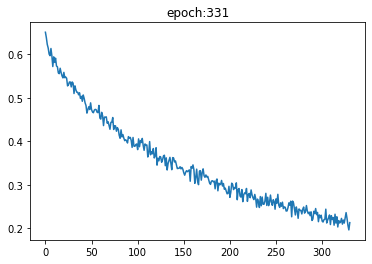

epoch:  331 -- 57  seconds -- loss: 0.20354239145914713
epoch:  332 -- 57  seconds -- loss: 0.21978882380894252
epoch:  333 -- 57  seconds -- loss: 0.1954346157255627
epoch:  334 -- 56  seconds -- loss: 0.22125857216971262
valid class 0: tensor([50, 17, 43, 40, 17, 79, 26, 15, 58, 55, 33, 65, 70, 73, 57])
valid class 1: tensor([50, 44, 74, 47, 52, 59, 65, 54, 41, 65, 55, 11, 51, 24, 81])
epoch:  335 -- 63  seconds -- loss: 0.18933423360188803
epoch:  336 -- 56  seconds -- loss: 0.22021815890357607
epoch:  337 -- 56  seconds -- loss: 0.20280299867902482
epoch:  338 -- 56  seconds -- loss: 0.19770597276233493
epoch:  339 -- 57  seconds -- loss: 0.22129939851306735
valid class 0: tensor([56, 13, 52, 27, 46, 69, 30, 34, 51, 57, 56, 64, 69, 77, 59])
valid class 1: tensor([48, 68, 84, 58, 60, 71, 58, 28, 47, 68, 55, 14, 56, 24, 67])
epoch:  340 -- 62  seconds -- loss: 0.19651917048863002
tensor([ 3, 33,  0, 21, 27,  1,  1, 41, 96, 99, 62, 44, 75, 99, 99, 99],
       device='cuda:0')


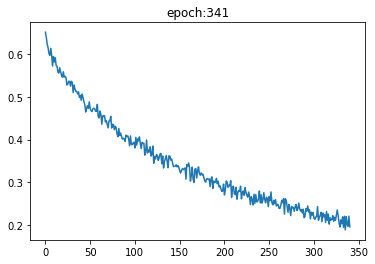

epoch:  341 -- 57  seconds -- loss: 0.209496952238537
epoch:  342 -- 57  seconds -- loss: 0.20373648688906715
epoch:  343 -- 56  seconds -- loss: 0.20482596896943592
epoch:  344 -- 56  seconds -- loss: 0.20772264117286318
valid class 0: tensor([46, 17, 34, 33, 28, 69, 34, 28, 67, 67, 41, 66, 82, 54, 57])
valid class 1: tensor([49, 39, 68, 55, 45, 48, 71, 45, 19, 74, 45, 26, 45, 33, 46])
epoch:  345 -- 63  seconds -- loss: 0.21523244040352957
epoch:  346 -- 57  seconds -- loss: 0.21416030611310685
epoch:  347 -- 57  seconds -- loss: 0.2201480638413202
epoch:  348 -- 56  seconds -- loss: 0.2100816908336821
epoch:  349 -- 56  seconds -- loss: 0.22651177360897973
valid class 0: tensor([45, 23, 48, 49, 41, 56, 36, 20, 61, 47, 40, 40, 78, 77, 46])
valid class 1: tensor([51, 78, 76, 64, 68, 54, 70, 34, 32, 60, 70, 21, 58, 35, 73])
epoch:  350 -- 62  seconds -- loss: 0.2135217303321475
tensor([31,  3,  0,  3,  3,  0,  0,  1, 93, 99, 95, 97, 87, 67, 89, 97],
       device='cuda:0')


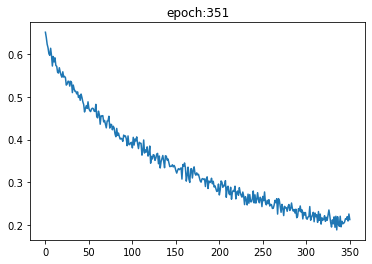

epoch:  351 -- 57  seconds -- loss: 0.20641765140351795
epoch:  352 -- 57  seconds -- loss: 0.20822668075561523
epoch:  353 -- 56  seconds -- loss: 0.1853877135685512
epoch:  354 -- 57  seconds -- loss: 0.21292670567830405
valid class 0: tensor([31, 38, 38, 39, 31, 41, 32, 30, 70, 43, 36, 46, 71, 59, 36])
valid class 1: tensor([46, 64, 71, 58, 57, 57, 56, 27, 26, 43, 46, 23, 40, 43, 65])
epoch:  355 -- 62  seconds -- loss: 0.20707757132393972
epoch:  356 -- 57  seconds -- loss: 0.21744271687098912
epoch:  357 -- 56  seconds -- loss: 0.20287166322980607
epoch:  358 -- 56  seconds -- loss: 0.19783176694597518
epoch:  359 -- 57  seconds -- loss: 0.20785942531767346
valid class 0: tensor([24, 41, 33, 26, 45,  6, 46, 70, 60, 23, 56, 24, 40, 53, 52])
valid class 1: tensor([30, 73, 59, 47, 35, 46, 56, 22, 53, 59, 42, 43, 29, 41, 24])
epoch:  360 -- 62  seconds -- loss: 0.1991109393891834
tensor([ 0,  0,  4, 92,  0, 19, 11,  2, 98, 89, 99, 99, 99, 69,  9, 56],
       device='cuda:0')


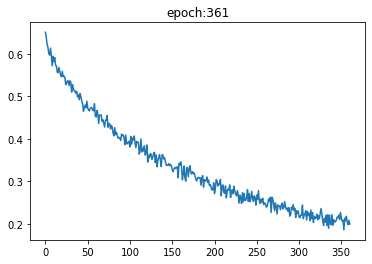

epoch:  361 -- 57  seconds -- loss: 0.1948039418175107
epoch:  362 -- 57  seconds -- loss: 0.18733045033046178
epoch:  363 -- 57  seconds -- loss: 0.21425101870582217
epoch:  364 -- 57  seconds -- loss: 0.2190738632565453
valid class 0: tensor([42, 34, 55, 40, 27, 62, 18, 25, 80, 53, 44, 69, 79, 45, 43])
valid class 1: tensor([32, 55, 76, 69, 50, 59, 46, 21, 31, 44, 55, 15, 46, 37, 66])
epoch:  365 -- 63  seconds -- loss: 0.21212702705746606
epoch:  366 -- 57  seconds -- loss: 0.20690338952200754
epoch:  367 -- 57  seconds -- loss: 0.2129689852396647
epoch:  368 -- 56  seconds -- loss: 0.18986473764692033
epoch:  369 -- 56  seconds -- loss: 0.18483378773643858
valid class 0: tensor([36, 36, 41, 53, 45, 30, 32, 60, 63, 42, 59, 33, 75, 57, 34])
valid class 1: tensor([45, 49, 74, 61, 52, 38, 64, 18, 40, 79, 50, 15, 53, 39, 35])
epoch:  370 -- 62  seconds -- loss: 0.20712430136544363
tensor([ 1,  1,  0,  1, 41,  2,  2, 24, 22, 85, 49, 99, 99, 64, 82, 99],
       device='cuda:0')


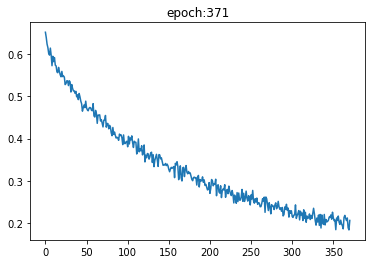

epoch:  371 -- 57  seconds -- loss: 0.18670310292925155
epoch:  372 -- 57  seconds -- loss: 0.18411152703421457
epoch:  373 -- 56  seconds -- loss: 0.19922158831641787
epoch:  374 -- 56  seconds -- loss: 0.19245574587867373
valid class 0: tensor([33, 28, 30, 29, 45, 16, 32, 41, 55, 35, 45, 39, 64, 57, 20])
valid class 1: tensor([25, 51, 72, 53, 51, 37, 45, 31, 47, 48, 39, 21, 34, 19, 43])
epoch:  375 -- 62  seconds -- loss: 0.17921059472220285
epoch:  376 -- 56  seconds -- loss: 0.19930405843825566
epoch:  377 -- 56  seconds -- loss: 0.19917781012398855
epoch:  378 -- 56  seconds -- loss: 0.1895659083411807
epoch:  379 -- 57  seconds -- loss: 0.1892815317426409
valid class 0: tensor([46, 24, 42, 58, 13, 92, 28, 10, 48, 61, 52, 75, 64, 58, 71])
valid class 1: tensor([59, 39, 82, 28, 42, 54, 62, 55, 46, 82, 54, 23, 62, 36, 71])
epoch:  380 -- 62  seconds -- loss: 0.19866223562331425
tensor([11,  0,  8,  0, 32,  0, 52, 12, 94, 78, 99, 83, 98, 99, 88, 17],
       device='cuda:0')


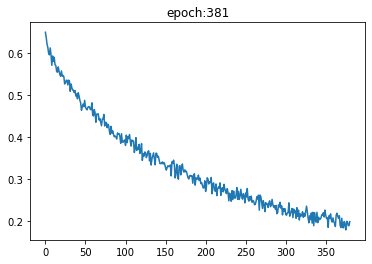

epoch:  381 -- 57  seconds -- loss: 0.15986317679995582
epoch:  382 -- 57  seconds -- loss: 0.18170544079371861
epoch:  383 -- 57  seconds -- loss: 0.18318337485903785
epoch:  384 -- 57  seconds -- loss: 0.18468710354396276
valid class 0: tensor([55, 44, 34, 53, 28, 94, 33, 12, 47, 64, 46, 71, 80, 68, 78])
valid class 1: tensor([48, 65, 78, 47, 39, 53, 57, 62, 39, 75, 32, 28, 65, 54, 52])
epoch:  385 -- 63  seconds -- loss: 0.2064821379525321
epoch:  386 -- 57  seconds -- loss: 0.20960224242437453
epoch:  387 -- 57  seconds -- loss: 0.17441849481491817
epoch:  388 -- 57  seconds -- loss: 0.19176324208577475
epoch:  389 -- 56  seconds -- loss: 0.17131555648077101
valid class 0: tensor([16, 54, 19, 17, 33,  7, 13, 59, 36,  3, 58, 18, 27, 25, 21])
valid class 1: tensor([25, 62, 41, 27, 33, 19, 29,  4, 35, 15, 25, 16, 28, 14, 16])
epoch:  390 -- 62  seconds -- loss: 0.18708952267964682
tensor([ 0,  6, 10,  0, 84,  0,  1, 11, 98, 99, 99, 99, 99, 58, 30, 13],
       device='cuda:0')


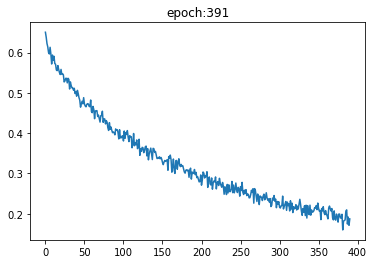

epoch:  391 -- 57  seconds -- loss: 0.18708356221516928
epoch:  392 -- 57  seconds -- loss: 0.1872671331678118
epoch:  393 -- 56  seconds -- loss: 0.18047294162568592
epoch:  394 -- 57  seconds -- loss: 0.17170967374529159
valid class 0: tensor([44, 24, 39, 41, 50, 53, 36, 43, 63, 53, 48, 62, 74, 54, 47])
valid class 1: tensor([50, 48, 83, 43, 60, 42, 47, 39, 50, 81, 36, 17, 48, 47, 50])
epoch:  395 -- 62  seconds -- loss: 0.17554502260117305
epoch:  396 -- 56  seconds -- loss: 0.19513622919718424
epoch:  397 -- 56  seconds -- loss: 0.18895317259288968
epoch:  398 -- 56  seconds -- loss: 0.18303537368774414
epoch:  399 -- 57  seconds -- loss: 0.17546008882068453
valid class 0: tensor([35, 29, 41, 41, 49, 28, 26, 40, 63, 33, 44, 42, 62, 44, 25])
valid class 1: tensor([44, 67, 58, 42, 59, 27, 62, 24, 48, 46, 46, 27, 33, 35, 49])
epoch:  400 -- 63  seconds -- loss: 0.16817003204709008
tensor([ 0,  0,  1,  0,  3,  0,  6,  8, 88, 94, 99, 96, 99, 68, 87, 95],
       device='cuda:0')


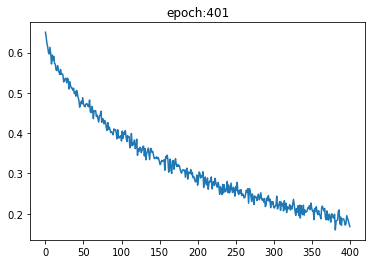

epoch:  401 -- 57  seconds -- loss: 0.200858888171968
epoch:  402 -- 57  seconds -- loss: 0.19751249040876115
epoch:  403 -- 57  seconds -- loss: 0.17625309172130765
epoch:  404 -- 57  seconds -- loss: 0.16773517926534018
valid class 0: tensor([79, 49, 55, 70, 57, 94, 40, 15, 70, 91, 56, 94, 87, 82, 81])
valid class 1: tensor([61, 68, 89, 62, 69, 72, 76, 77, 56, 78, 69, 24, 76, 48, 84])
epoch:  405 -- 63  seconds -- loss: 0.21503900346301852
epoch:  406 -- 57  seconds -- loss: 0.18641497975304014
epoch:  407 -- 57  seconds -- loss: 0.1948434284755162
epoch:  408 -- 57  seconds -- loss: 0.20230386370704287
epoch:  409 -- 57  seconds -- loss: 0.18718507176353819
valid class 0: tensor([49, 44, 48, 44, 39, 68, 45, 35, 69, 40, 50, 61, 74, 59, 44])
valid class 1: tensor([54, 48, 78, 29, 56, 44, 64, 15, 19, 56, 49, 30, 55, 39, 66])
epoch:  410 -- 62  seconds -- loss: 0.1833704426175072
tensor([ 7,  4, 18,  1,  0, 57,  8, 30, 97, 93, 99, 99, 90, 98, 95, 49],
       device='cuda:0')


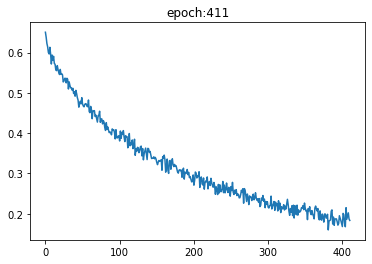

epoch:  411 -- 57  seconds -- loss: 0.1860014143444243
epoch:  412 -- 56  seconds -- loss: 0.2193321046375093
epoch:  413 -- 56  seconds -- loss: 0.18742767969767252
epoch:  414 -- 56  seconds -- loss: 0.1749180725642613
valid class 0: tensor([41, 24, 37, 38, 35, 43, 34, 43, 53, 38, 28, 47, 72, 48, 43])
valid class 1: tensor([35, 71, 72, 44, 74, 50, 67, 13, 22, 28, 43, 26, 47, 29, 66])
epoch:  415 -- 62  seconds -- loss: 0.1837597347441174
epoch:  416 -- 57  seconds -- loss: 0.19231162752423966
epoch:  417 -- 56  seconds -- loss: 0.19028469494410924
epoch:  418 -- 57  seconds -- loss: 0.18075005213419595
epoch:  419 -- 57  seconds -- loss: 0.16615934599013554
valid class 0: tensor([51, 38, 32, 28, 51, 30, 24, 37, 66, 32, 37, 41, 65, 50, 29])
valid class 1: tensor([49, 64, 74, 36, 67, 37, 49, 25, 28, 48, 46, 13, 43, 13, 48])
epoch:  420 -- 63  seconds -- loss: 0.1684502987634568
tensor([ 0,  0,  0,  0,  0,  0,  0,  6, 98, 89, 40, 80, 99, 93, 94, 99],
       device='cuda:0')


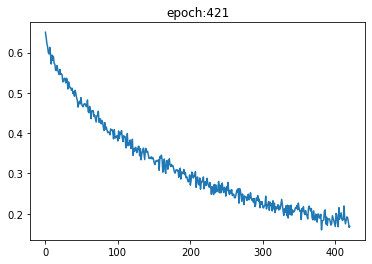

epoch:  421 -- 57  seconds -- loss: 0.18824053945995511
epoch:  422 -- 56  seconds -- loss: 0.16810327484494164
epoch:  423 -- 56  seconds -- loss: 0.18155100232078916
epoch:  424 -- 56  seconds -- loss: 0.18915625980922154
valid class 0: tensor([63, 33, 59, 53, 60, 67, 33, 32, 49, 46, 36, 65, 68, 64, 48])
valid class 1: tensor([69, 80, 72, 62, 82, 48, 56, 20, 37, 58, 63, 11, 57, 38, 59])
epoch:  425 -- 62  seconds -- loss: 0.18674870899745397
epoch:  426 -- 56  seconds -- loss: 0.1706944533756801
epoch:  427 -- 56  seconds -- loss: 0.16148437772478377
epoch:  428 -- 56  seconds -- loss: 0.18368132909138998
epoch:  429 -- 56  seconds -- loss: 0.17050749914986746
valid class 0: tensor([61, 32, 42, 42, 49, 65, 27, 13, 56, 61, 58, 61, 62, 60, 47])
valid class 1: tensor([58, 77, 69, 56, 60, 56, 59, 32, 31, 55, 65, 17, 62, 25, 58])
epoch:  430 -- 62  seconds -- loss: 0.176249174844651
tensor([ 6,  1,  2,  0,  0, 14,  0,  0, 98, 97, 99, 99, 97, 58, 95, 85],
       device='cuda:0')


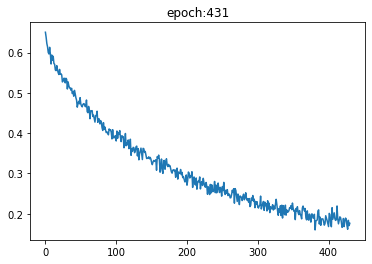

epoch:  431 -- 57  seconds -- loss: 0.1668104330698649
epoch:  432 -- 56  seconds -- loss: 0.1755472251347133
epoch:  433 -- 56  seconds -- loss: 0.17762464568728492
epoch:  434 -- 56  seconds -- loss: 0.16379762831188382
valid class 0: tensor([44, 36, 40, 36, 50, 20, 29, 31, 69, 37, 56, 33, 80, 74, 37])
valid class 1: tensor([53, 46, 63, 65, 70, 46, 52, 28, 35, 59, 44, 27, 62, 31, 63])
epoch:  435 -- 62  seconds -- loss: 0.17293356713794528
epoch:  436 -- 56  seconds -- loss: 0.1898868992215111
epoch:  437 -- 56  seconds -- loss: 0.18229523159208752
epoch:  438 -- 56  seconds -- loss: 0.17345044726417178
epoch:  439 -- 56  seconds -- loss: 0.1682231312706357
valid class 0: tensor([41, 37, 42, 36, 29, 61, 34, 26, 62, 33, 50, 46, 69, 63, 43])
valid class 1: tensor([44, 57, 73, 42, 38, 38, 53, 31, 37, 73, 35, 11, 46, 27, 44])
epoch:  440 -- 62  seconds -- loss: 0.1708648885999407
tensor([ 2,  0,  5,  3,  0,  6, 10,  2, 99, 99,  1, 96, 93, 97, 99, 99],
       device='cuda:0')


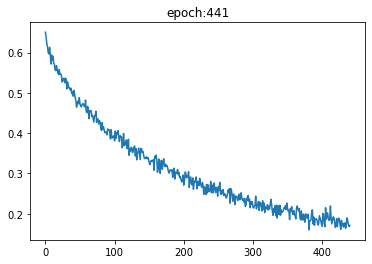

epoch:  441 -- 57  seconds -- loss: 0.17007046654110863
epoch:  442 -- 57  seconds -- loss: 0.16623465220133463
epoch:  443 -- 57  seconds -- loss: 0.18656350317455472
epoch:  444 -- 57  seconds -- loss: 0.17525544620695568
valid class 0: tensor([25, 43, 19, 19, 47,  8, 20, 55, 83, 17, 55, 38, 60, 31, 17])
valid class 1: tensor([43, 51, 64, 40, 30, 25, 62, 12, 43, 31, 33, 18, 34, 24, 33])
epoch:  445 -- 62  seconds -- loss: 0.17343942324320474
epoch:  446 -- 57  seconds -- loss: 0.17652182351975215
epoch:  447 -- 57  seconds -- loss: 0.16340535027640207
epoch:  448 -- 57  seconds -- loss: 0.17022917384193056
epoch:  449 -- 56  seconds -- loss: 0.17903265498933338
valid class 0: tensor([47, 42, 38, 45, 64, 32, 44, 49, 75, 30, 49, 43, 58, 40, 29])
valid class 1: tensor([64, 57, 70, 38, 72, 40, 57, 22, 47, 47, 46,  9, 51, 21, 38])
epoch:  450 -- 62  seconds -- loss: 0.16328095254443942
tensor([ 0,  2,  0,  0,  7,  0, 17,  0, 99, 93, 99, 40, 99, 99, 99, 93],
       device='cuda:0')


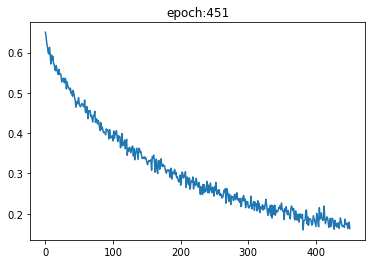

epoch:  451 -- 56  seconds -- loss: 0.15621480487641834
epoch:  452 -- 56  seconds -- loss: 0.16453307015555246
epoch:  453 -- 56  seconds -- loss: 0.16699224426632836
epoch:  454 -- 56  seconds -- loss: 0.15745944068545387
valid class 0: tensor([45, 40, 30, 24, 38, 35, 37, 46, 71, 32, 44, 49, 61, 28, 39])
valid class 1: tensor([28, 70, 63, 49, 59, 32, 38, 27, 33, 57, 54, 15, 45, 32, 38])
epoch:  455 -- 62  seconds -- loss: 0.18111772764296757
epoch:  456 -- 57  seconds -- loss: 0.1654609271458217
epoch:  457 -- 57  seconds -- loss: 0.18378308841160365
epoch:  458 -- 57  seconds -- loss: 0.16230007580348424
epoch:  459 -- 56  seconds -- loss: 0.1895048731849307
valid class 0: tensor([48, 28, 38, 36, 45, 41, 25, 36, 66, 59, 55, 32, 75, 51, 51])
valid class 1: tensor([58, 48, 65, 47, 43, 49, 48, 32, 40, 53, 42, 15, 50, 25, 47])
epoch:  460 -- 62  seconds -- loss: 0.18023294494265601
tensor([11,  0,  0, 14, 17,  6, 96,  4,  6, 95, 97, 96, 99, 98, 93, 98],
       device='cuda:0')


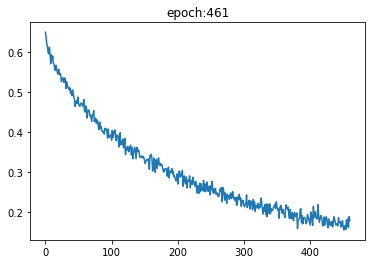

epoch:  461 -- 56  seconds -- loss: 0.18160740534464517
epoch:  462 -- 56  seconds -- loss: 0.16546553657168434
epoch:  463 -- 57  seconds -- loss: 0.1738762174333845
epoch:  464 -- 57  seconds -- loss: 0.16676733607337588
valid class 0: tensor([54, 46, 41, 48, 57, 38, 28, 41, 77, 53, 55, 41, 69, 57, 49])
valid class 1: tensor([51, 70, 83, 54, 71, 46, 64, 27, 21, 54, 42, 26, 50, 35, 61])
epoch:  465 -- 62  seconds -- loss: 0.18042976515633719
epoch:  466 -- 57  seconds -- loss: 0.15723438490004765
epoch:  467 -- 56  seconds -- loss: 0.15421439352489652
epoch:  468 -- 56  seconds -- loss: 0.17385248910813106
epoch:  469 -- 56  seconds -- loss: 0.1528566110701788
valid class 0: tensor([53, 41, 44, 45, 58, 70, 39, 21, 47, 35, 50, 42, 78, 38, 34])
valid class 1: tensor([60, 56, 76, 52, 68, 31, 30, 31, 41, 80, 35, 16, 46, 35, 52])
epoch:  470 -- 62  seconds -- loss: 0.15761989638918922
tensor([ 2, 25,  0, 41,  0,  5,  0,  0, 50, 89, 99,  8, 99, 96, 99,  9],
       device='cuda:0')


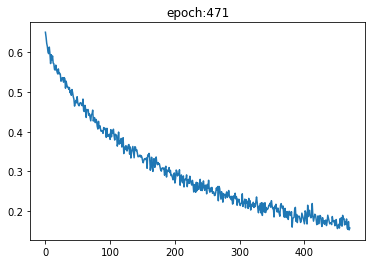

epoch:  471 -- 57  seconds -- loss: 0.15844055584498815
epoch:  472 -- 56  seconds -- loss: 0.1605009464990525
epoch:  473 -- 57  seconds -- loss: 0.14340820766630627
epoch:  474 -- 57  seconds -- loss: 0.1636332216716948
valid class 0: tensor([55, 21, 56, 75, 45, 79, 39, 31, 85, 79, 35, 60, 58, 67, 39])
valid class 1: tensor([66, 65, 79, 56, 55, 72, 49, 47, 25, 65, 57, 21, 57, 46, 70])
epoch:  475 -- 62  seconds -- loss: 0.16329810732886904
epoch:  476 -- 57  seconds -- loss: 0.1723563103448777
epoch:  477 -- 56  seconds -- loss: 0.16045503389267696
epoch:  478 -- 56  seconds -- loss: 0.14870014644804455
epoch:  479 -- 56  seconds -- loss: 0.16387900852021717
valid class 0: tensor([54, 32, 54, 63, 15, 97, 26, 21, 69, 92, 43, 76, 69, 57, 84])
valid class 1: tensor([72, 54, 76, 71, 43, 96, 70, 74, 62, 87, 60, 26, 79, 56, 62])
epoch:  480 -- 62  seconds -- loss: 0.1361483619326637
tensor([ 0, 37, 38,  2,  0,  0, 24,  4, 94, 15, 99, 98, 97, 23, 99, 98],
       device='cuda:0')


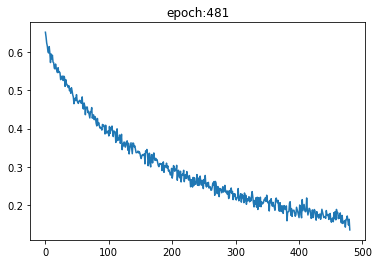

epoch:  481 -- 57  seconds -- loss: 0.1606346539088658
epoch:  482 -- 57  seconds -- loss: 0.1426405566079276
epoch:  483 -- 57  seconds -- loss: 0.17181577001299178
epoch:  484 -- 57  seconds -- loss: 0.16850293250310988
valid class 0: tensor([49, 43, 30, 58, 55, 58, 44, 18, 55, 44, 52, 54, 69, 58, 36])
valid class 1: tensor([28, 74, 68, 41, 46, 19, 44, 27, 55, 63, 42, 21, 51, 30, 37])
epoch:  485 -- 62  seconds -- loss: 0.16054056939624606
epoch:  486 -- 57  seconds -- loss: 0.1661726293109712
epoch:  487 -- 57  seconds -- loss: 0.15455796605064756
epoch:  488 -- 57  seconds -- loss: 0.14913779213314965
epoch:  489 -- 57  seconds -- loss: 0.14308101790291922
valid class 0: tensor([69, 27, 55, 59, 60, 77, 38, 31, 88, 71, 58, 86, 93, 72, 66])
valid class 1: tensor([73, 63, 79, 66, 67, 57, 60, 44, 51, 55, 66, 23, 61, 35, 71])
epoch:  490 -- 62  seconds -- loss: 0.1494965666816348
tensor([ 0,  1, 36,  0,  3,  0,  8,  0, 54, 78, 99, 99, 72, 97, 83, 98],
       device='cuda:0')


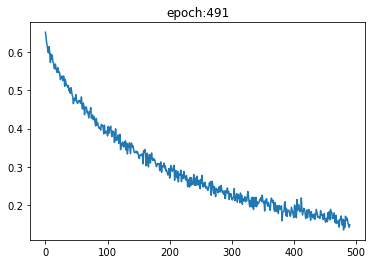

epoch:  491 -- 57  seconds -- loss: 0.15073670659746444
epoch:  492 -- 57  seconds -- loss: 0.165309054510934
epoch:  493 -- 57  seconds -- loss: 0.15528556278773717
epoch:  494 -- 56  seconds -- loss: 0.1485488528297061
valid class 0: tensor([53, 40, 37, 50, 41, 66, 45, 23, 55, 44, 46, 54, 87, 73, 46])
valid class 1: tensor([46, 65, 82, 61, 58, 62, 64, 32, 34, 49, 48, 28, 64, 33, 61])
epoch:  495 -- 62  seconds -- loss: 0.1576321011497861
epoch:  496 -- 56  seconds -- loss: 0.15302058628627233
epoch:  497 -- 56  seconds -- loss: 0.17201234045482816
epoch:  498 -- 56  seconds -- loss: 0.1543643247513544
epoch:  499 -- 56  seconds -- loss: 0.1591408479781378
valid class 0: tensor([49, 24, 38, 53, 40, 54, 29, 30, 49, 41, 33, 48, 79, 51, 53])
valid class 1: tensor([43, 63, 73, 67, 58, 54, 52, 45, 36, 30, 33, 23, 53, 28, 64])
epoch:  500 -- 62  seconds -- loss: 0.15225472904386975
tensor([ 4,  0,  0,  0,  1,  0,  0,  7, 81, 99, 76, 12, 99, 94, 96, 99],
       device='cuda:0')


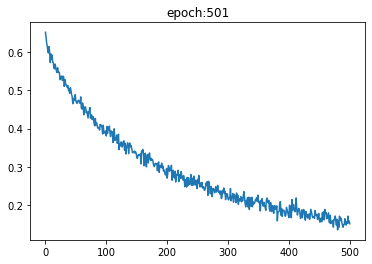

epoch:  501 -- 57  seconds -- loss: 0.14929539816720144
epoch:  502 -- 56  seconds -- loss: 0.15443860916864305
epoch:  503 -- 56  seconds -- loss: 0.15236332303001768
epoch:  504 -- 57  seconds -- loss: 0.13569563911074684
valid class 0: tensor([31, 54, 36, 37, 52, 13, 31, 58, 45, 32, 67, 48, 54, 49, 35])
valid class 1: tensor([31, 55, 75, 51, 48, 49, 63, 12, 59, 58, 45, 21, 35, 42, 26])
epoch:  505 -- 62  seconds -- loss: 0.14625813847496397
epoch:  506 -- 56  seconds -- loss: 0.1489391326904297
epoch:  507 -- 56  seconds -- loss: 0.15576885995410739
epoch:  508 -- 56  seconds -- loss: 0.15159409386771067
epoch:  509 -- 56  seconds -- loss: 0.13167150815327963
valid class 0: tensor([30, 21, 39, 46, 21, 60, 29, 23, 65, 50, 40, 54, 77, 46, 43])
valid class 1: tensor([40, 54, 61, 48, 39, 47, 65, 13, 38, 42, 60, 12, 42, 46, 53])
epoch:  510 -- 62  seconds -- loss: 0.16215075765337264
tensor([ 1, 16,  1,  0,  0, 99,  1,  1, 99, 94, 94,  4, 99, 99,  7, 99],
       device='cuda:0')


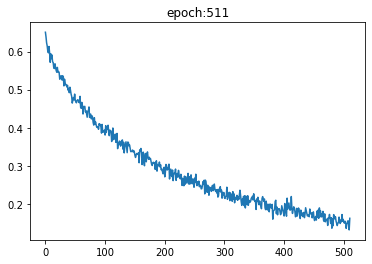

epoch:  511 -- 57  seconds -- loss: 0.14295486041477748


In [62]:
bs0 = 16
bs = 32
N = 85
Nv = 15
nepoch = 512

loss_train = np.array([])  # train loss들 저장해 놓을 numpy array??
for epoch in range(0,nepoch):  # nepoch만큼 반복   
    s0 = time.time()           # 한 epoch이 시작한 시각을 s0에 할당

    model.eval()               # inference 먼저??
    d0 = torch.tensor([])
    d1 = torch.tensor([])
    v0 = torch.tensor([])
    v1 = torch.tensor([])    
    for d in D0[:N]:           # train noln data로더 과정??
        loader = Data.DataLoader(d,batch_size=bs0,shuffle=True) 
        for idx, img in enumerate(loader):
            d0 = torch.cat((d0,img[0]),dim=0) #torch.cat() 은 주어진 차원을 기준으로 주어진 텐서들을 붙임(concatenate)
            break
    
    for d in D1[:N]:           # train ln data로더 과정??
        loader = Data.DataLoader(d,batch_size=bs0,shuffle=True)
        for idx, img in enumerate(loader):  
            d1 = torch.cat((d1,img[0]),dim=0)                
            break

    if epoch%5==0:             # 다섯번째 epoch일 때마다 (해당 횟수가 5의 배수째일때)
        v0v = torch.tensor([])  # valid??
        v1v = torch.tensor([])  # valid?? 
        for d in D0[-Nv:]:      # vlaid noln data로더 과정?? (Valid 15니까 -15면 86부터 100)
            loader = Data.DataLoader(d,batch_size=bs0,shuffle=True) # data loader
            for idx, img in enumerate(loader):    
                with torch.no_grad():
                    out = model(transform_val(img[0].cuda()))
                outs =  out.softmax(1)
                v0v = torch.cat((v0v,outs[:,1].mean().reshape(1,1).cpu()),dim=1)
                break
        print("valid class 0:",(v0v*100).long()[0])  # 비전이 class : 0

        for d in D1[-Nv:]:      # valid ln data로더 과정??
            loader = Data.DataLoader(d,batch_size=bs0,shuffle=True)
            for idx, img in enumerate(loader):  
                with torch.no_grad():
                    out = model(transform_val(img[0].cuda()))
                outs =  out.softmax(1)
                v1v = torch.cat((v1v,outs[:,1].mean().reshape(1,1).cpu()),dim=1)
                break               
        print("valid class 1:",(v1v*100).long()[0]) # 전이 class : 1
    
    model.train() # model.train() inferecen후 뽑힌 top patch들로 학습??
    l_epoch = 0   

    for m in range(0,2):
        idx0 = np.random.permutation(np.arange(0,len(d0))) # train noln 에 대해무작위로 섞인 배열을 만듬 (0에서 d0만큼의 범위로)
        idx1 = np.random.permutation(np.arange(0,len(d1))) # train ln에 대해무작위로 섞인 배열을 만듬 (0에서 d0만큼의 범위로)
        d0 = d0[idx0] #idx0 순서대로 d0가 바뀜 ex) d0 = [1,2,3],idx0 = [2,0,1] ,d0[idx0] : [3,1,2]
        d1 = d1[idx1]
        for n in range(0,int(N*bs0/(2*bs))): # (0,int(85*16/(2*32))) : (0,21)
            img = torch.cat((d0[int(n*bs):int((n+1)*bs)],d1[int(n*bs):int((n+1)*bs)]),dim=0).cuda()
            tgt = torch.cat((torch.zeros(int(bs),),torch.ones(int(bs),)),dim=0) #label?? 0 : noln 1 : ln
            out = model(transform_new(img)) # transform_new(img)
            l = loss(out,tgt.cuda().long()) # output과 label의 차로 loss값 구함 # long 타입의 텐서로 변경되고 .float()이라고 하면 float 
            l_epoch += l # epoch당 loss 누적해서 더함
            alg.zero_grad() # 이전 step에서 각 layer 별로 계산된 gradient 값을 모두 0으로 초기화 시키는 작업
            l.backward() # 각 layer의 파라미터에 대하여 back-propagation을 통해 gradient를 계산
            alg.step() # 각 layer의 파라미터와 같이 저장된 gradient 값을 이용하여 파라미터를 업데이트
                       # 이 명령어를 통해 파라미터가 업데이트되어 모델의 성능이 개선됨

    loss_train = np.append(loss_train,l_epoch.cpu().detach().numpy()/((n+1)*(m+1))) # loss_train 계산
    s1 = time.time()  # epoch끝난 시점의 시각
    print('epoch: ',epoch ,'--',int(s1-s0),' seconds -- loss:',l_epoch.cpu().detach().numpy()/((n+1)*(m+1))) #한 epoch에 걸린 시간 계산
    if epoch%10==0: # 10의 배수에 해당하는 epoch이면
        print((out.softmax(1)[::4,1]*100).long()) #output에 softmax취해서 
        plt.plot(loss_train) # loss train 출력
        plt.title(f'epoch:{epoch+1}')
        plt.show()
        torch.save(model.state_dict(),f'Y:\\mhson\\2022_01_10\\model\\v20220108_res18_c256_l3_epoch{epoch}.pth')

In [59]:
abc0 = torch.tensor([1,2,3,4])

kkk = np.random.permutation(np.arange(0,len(abc0)))
print("kkk")
print(kkk)
kk = np.random.permutation(kkk)
print("kk")
print(kk)

abc0 = abc0[kk]
print(abc0)

kkk
[3 0 2 1]
kk
[2 0 3 1]
tensor([3, 1, 4, 2])


In [61]:
torch.cat((torch.zeros(int(3),),torch.ones(int(3),)),dim=0)

tensor([0., 0., 0., 1., 1., 1.])